<a href="https://colab.research.google.com/github/itz-john/Residential_Price_Analysis_Using_Machine_Learning/blob/main/Residential_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from matplotlib import pyplot
import graphviz
from sklearn import tree

#*IMPORT THE DATASET*

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train-chennai-sale.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## *SMALL SUMMARY OF THE DATA*

In [ ]:
df.shape

(7109, 22)

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

# **CLEAN THE DATA**
To clean the data i'm going to do 4 steps:
  
  1. Missing values(data) and checking duplicate data
  2. Spelling correction
  3. Data format check (datatype)
  4. Outlier check

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


## **First step is to check is there any missing value(data) & Duplicates data**

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
b=df['N_BEDROOM'].mode()
a=df['N_BATHROOM'].mode()
b,a

(0    1.0
 Name: N_BEDROOM, dtype: float64,
 0    1.0
 Name: N_BATHROOM, dtype: float64)

In [ ]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(1.0)
df['N_BATHROOM']=df['N_BATHROOM'].fillna(1.0)
df['N_BEDROOM'].unique(),df['N_BATHROOM'].unique()

(array([1., 2., 3., 4.]), array([1., 2.]))

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Here, i took mode to impute the data in both columns.

In [ ]:
dataset=df.dropna()
dataset.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

There is no null values in any column is confirmed.

In [ ]:
dataset.duplicated().sum()

0

There is no duplicates.

## **Second step is to check is data in right format**

In [ ]:
dataset.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
dataset['DATE_SALE'] = pd.to_datetime(dataset['DATE_SALE'])
dataset['DATE_BUILD'] = pd.to_datetime(dataset['DATE_BUILD'])

<ipython-input-20-2d3e5eb54c64>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['DATE_SALE'] = pd.to_datetime(dataset['DATE_SALE'])
<ipython-input-20-2d3e5eb54c64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DATE_SALE'] = pd.to_datetime(dataset['DATE_SALE'])
<ipython-input-20-2d3e5eb54c64>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['DATE_BUILD'] = pd.to_datetime(dataset['DATE_BUILD'])
<ipython-input-20-2d3e5eb54c64>:2: Sett

In [ ]:
dataset.N_BEDROOM = dataset.N_BEDROOM.astype('int64')
dataset.N_BATHROOM = dataset.N_BATHROOM.astype('int64')

<ipython-input-21-5cd132e04d78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.N_BEDROOM = dataset.N_BEDROOM.astype('int64')
<ipython-input-21-5cd132e04d78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.N_BATHROOM = dataset.N_BATHROOM.astype('int64')


In [ ]:
dataset.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [ ]:
dataset=dataset.drop(['REG_FEE', 'COMMIS'],axis=1)
dataset.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

Here, the datatypes are ready to work future

*PRT_ID*

In [ ]:
dataset=dataset.drop(['PRT_ID'],axis=1)
dataset.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

Here, We dropped the PRT_ID column.

## *AREA*

In [ ]:
dataset['AREA']=dataset['AREA'].str.replace(' ','')
dataset['AREA'].unique()

array(['Karapakkam', 'AnnaNagar', 'Adyar', 'Velachery', 'Chrompet',
       'KKNagar', 'TNagar', 'Chrompt', 'Chrmpet', 'Karapakam', 'AnaNagar',
       'Chormpet', 'Adyr', 'Velchery', 'AnnNagar'], dtype=object)

In [ ]:
dataset['AREA'].replace(['Chrompt', 'Chrmpet', 'Karapakam', 'AnaNagar','Chormpet', 'Adyr', 'Velchery', 'AnnNagar'],
                        [ 'Chrompet','Chrompet','Karapakkam','AnnaNagar','Chrompet','Adyar','Velachery','AnnaNagar'],
                        inplace=True)

In [ ]:
dataset['AREA'].unique()

array(['Karapakkam', 'AnnaNagar', 'Adyar', 'Velachery', 'Chrompet',
       'KKNagar', 'TNagar'], dtype=object)

We cleaned the AREA column.

*SALE_COND*

In [ ]:
dataset['SALE_COND']=dataset['SALE_COND'].str.replace(' ','')
dataset['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'NormalSale',
       'Partiall', 'PartiaLl'], dtype=object)

In [ ]:
dataset['SALE_COND'].replace(['Partiall', 'PartiaLl'],['Partial', 'Partial'],inplace=True)

In [ ]:
dataset['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'NormalSale'],
      dtype=object)

We cleaned the SALE_COND column.

*PARK_FACIL*

In [ ]:
dataset['PARK_FACIL']=dataset['PARK_FACIL'].str.replace(' ','')
dataset['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
dataset['PARK_FACIL'].replace('Noo','No',inplace=True)

In [ ]:
dataset['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

We cleaned the PARK_FACIL column.

*BUILTTYPE*

In [ ]:
dataset['BUILDTYPE']=dataset['BUILDTYPE'].str.replace(' ','')
dataset['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
dataset['BUILDTYPE'].replace(['Other','Comercial']
                            ,['Others', 'Commercial'],
                            inplace=True)

In [ ]:
dataset['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

We cleaned the BUILDTYPE column.

*UTILITY_AVAIL*

In [ ]:
dataset['UTILITY_AVAIL']=dataset['UTILITY_AVAIL'].str.replace(' ','')
dataset['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [ ]:
dataset['UTILITY_AVAIL'].replace('NoSeWa','NoSewa',inplace=True)

In [ ]:
dataset['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSewa'], dtype=object)

We cleaned the UTILITY_AVAIL column.

*STREET*

In [ ]:
dataset['STREET']=dataset['STREET'].str.replace(' ','')
dataset['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess', 'Pavd'], dtype=object)

In [ ]:
dataset['STREET'].replace('Pavd','Paved',inplace=True)

In [ ]:
dataset['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

We cleaned the STEERT column.

*MZZONE*

In [ ]:
dataset['MZZONE']=dataset['MZZONE'].str.replace(' ','')
dataset['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

There is no cleaning required.

## **Fourth step is there any outliers in the given data**

In [ ]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7.061000e+03
mean,1381.338479,99.583487,1.636312,1.213001,3.686730,3.516910,3.505764,3.485186,3.503254,1.088844e+07
std,457.785335,57.405192,0.803502,0.409457,1.019849,0.892244,0.897499,0.887059,0.527223,3.768319e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.268875e+06
50%,1370.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.032070e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298015e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07


*INT_SQFT*

In [ ]:
outlier=[]
mean,std=1381.338479,457.785335
for i in dataset['INT_SQFT']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


There is no outlier in INT_SQFT

DIST_MAINROAD

In [ ]:
outlier=[]
mean,std=99.583487,57.405192
for i in dataset['DIST_MAINROAD']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


There is no outlier in DIST_MAINROAD

By seeing itself we came to know there is no outliers in N_BEDROOM,N_ROOM,QS_ROOMS, QS_BEDROOM,QS_BATHROOM and QSOVERALL.Then, REG_FEE and COMMIS are not consider to be a feature.

*SALES_PRICE*

In [ ]:
outlier=[]
mean,std=1.088844e+07,3.768319e+06
for i in dataset['N_BEDROOM']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


There is no outlier in SALES_PRICE

*NEW FEATURE :*
Using DATE_BUILD & DATE_SALE construct SALE_YEAR, BUILD_YEAR and AGE columns then, drop DATE_BUILD & DATE_SALE.

In [ ]:
dataset['BUILD_YEAR'] = dataset['DATE_BUILD'].dt.year
dataset['SALE_YEAR'] = dataset['DATE_SALE'].dt.year

In [ ]:
dataset['AGE']=dataset['SALE_YEAR']-dataset['BUILD_YEAR']

We have age of the house as AGE column.Now, We can delete the DATE_SALE & DATE_BUILD columns.

In [ ]:
dataset=dataset.drop(['DATE_SALE','DATE_BUILD'],axis=1)
dataset.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILD_YEAR', 'SALE_YEAR', 'AGE'],
      dtype='object')

We done our cleaning processes.We create one feature using the given data. Now we move to the next processes of Exploratory Data Analysis (EDA).

## **EDA**
From EDA we can decide the encode type and feature relationships and importance.

##*DISTRIBUTION OF FEATURES*

In [ ]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,AGE
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7.061000e+03,7061.000000,7061.000000,7061.000000
mean,1381.338479,99.583487,1.636312,1.213001,3.686730,3.516910,3.505764,3.485186,3.503254,1.088844e+07,1985.489874,2009.766605,24.276731
std,457.785335,57.405192,0.803502,0.409457,1.019849,0.892244,0.897499,0.887059,0.527223,3.768319e+06,12.648207,2.206717,12.331248
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,1949.000000,2004.000000,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.268875e+06,1976.000000,2008.000000,14.000000
50%,1370.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.032070e+07,1986.000000,2010.000000,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298015e+07,1996.000000,2011.000000,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,2010.000000,2015.000000,55.000000


<ipython-input-52-f6e16e0800a7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.INT_SQFT)
<ipython-input-52-f6e16e0800a7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.DIST_MAINROAD,color = 'darkblue')


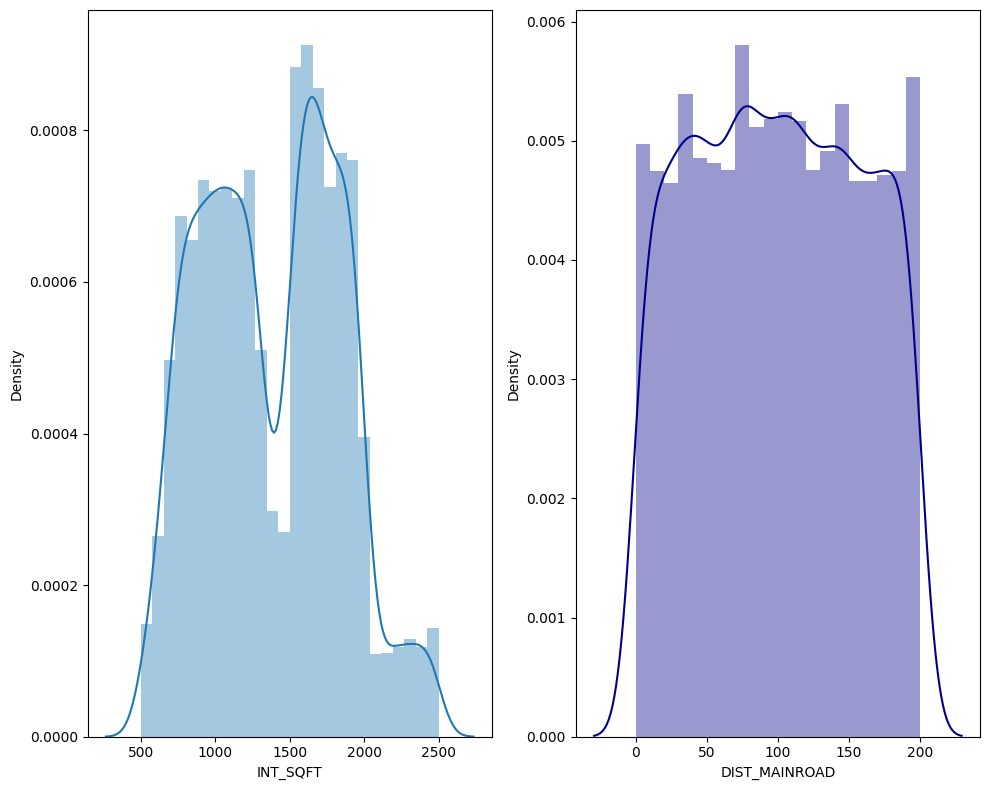

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(dataset.INT_SQFT)
plt.subplot(1,2,2)
sns.distplot(dataset.DIST_MAINROAD,color = 'darkblue')
plt.tight_layout()

Here,
INTSQFT doesn't have more skew.
DIST_MAINROAD have uniform distribution.

<ipython-input-53-2a55a756e1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.SALES_PRICE,color='green')
<ipython-input-53-2a55a756e1b3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.AGE,color='red')


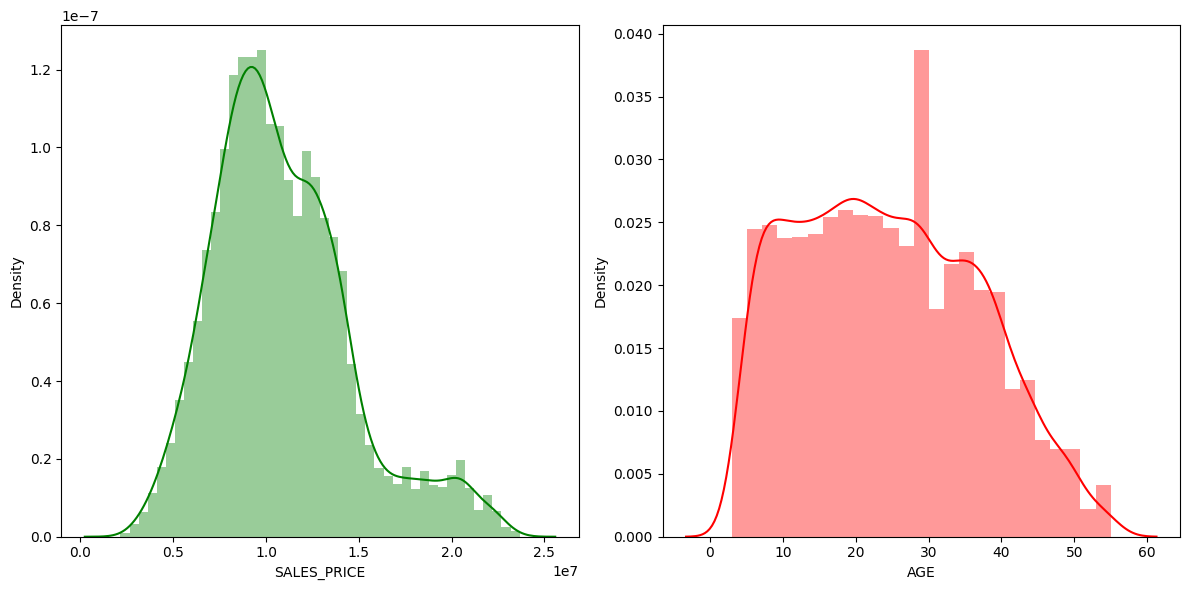

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(dataset.SALES_PRICE,color='green')
plt.subplot(1,2,2)
sns.distplot(dataset.AGE,color='red')
plt.tight_layout()

Here,
We can see small increase in AGE(age of the house) near to uniform distribution.
SALES_PRICE doesn't have more skew.

<ipython-input-54-e6adf3b85630>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.N_BATHROOM)
<ipython-input-54-e6adf3b85630>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.N_BEDROOM,color = 'darkblue')
<ipython-input-54-e6adf3b85630>:7: UserWarning: 

`distplot` is a deprecated

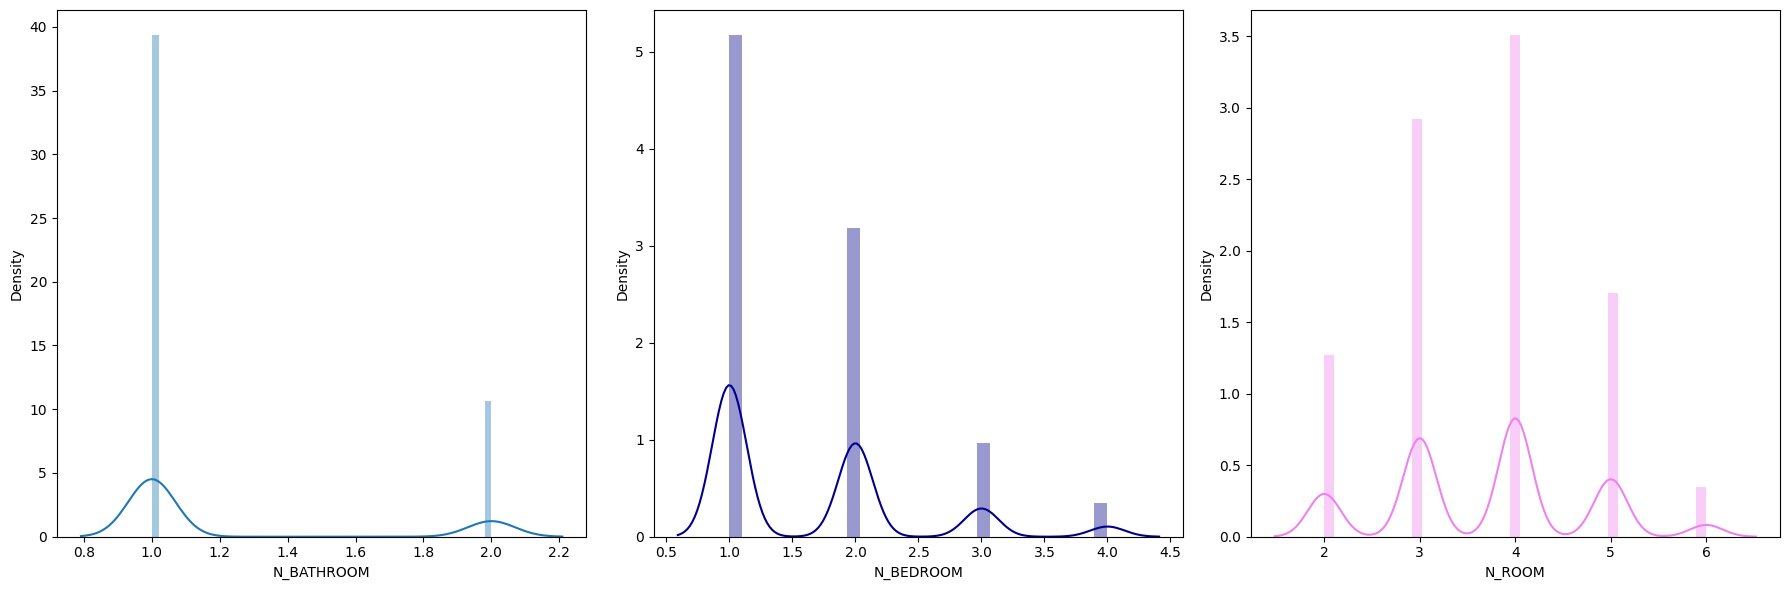

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.distplot(dataset.N_BATHROOM)
plt.subplot(1,3,2)
sns.distplot(dataset.N_BEDROOM,color = 'darkblue')
plt.subplot(1,3,3)
sns.distplot(dataset.N_ROOM,color = 'violet')
plt.tight_layout()
plt.show()

The above distribution, count shows that properties with 1 bathroom, 2 bedrooms , 4 number of rooms are highly available in our dataset.

<ipython-input-55-29154628ff8c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.QS_BATHROOM)
<ipython-input-55-29154628ff8c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.QS_BEDROOM,color = 'darkblue')
<ipython-input-55-29154628ff8c>:7: UserWarning: 

`distplot` is a deprecat

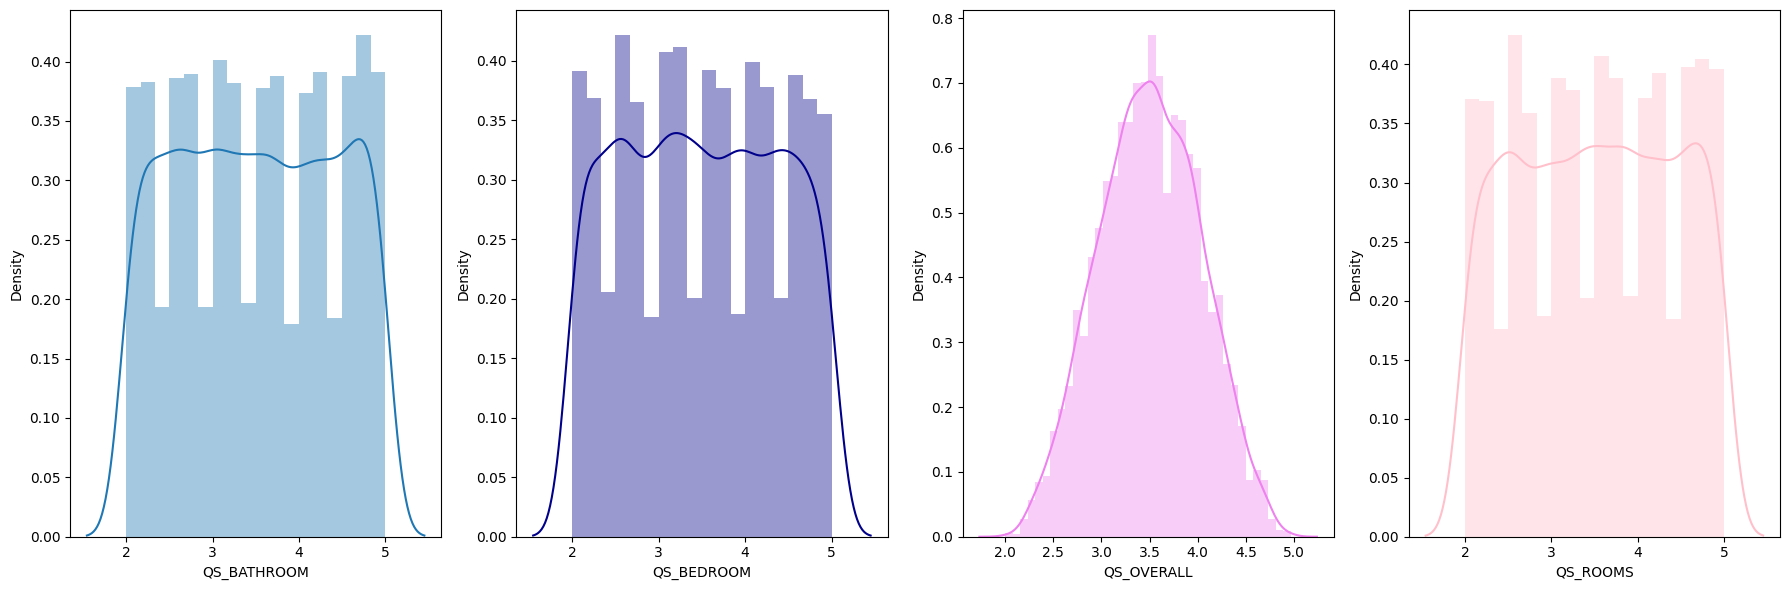

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
sns.distplot(dataset.QS_BATHROOM)
plt.subplot(1,4,2)
sns.distplot(dataset.QS_BEDROOM,color = 'darkblue')
plt.subplot(1,4,3)
sns.distplot(dataset.QS_OVERALL,color = 'violet')
plt.subplot(1,4,4)
sns.distplot(dataset.QS_ROOMS,color = 'pink')
plt.tight_layout()
plt.show()

QS_BATHROOM,QS_BEDROOM and QS_ROOMS near to uniform distribution.QS_OVERALL distribution near to normal distribution.

This distribution shows number of houses areawise.Chrompet have the high no. of houses and TNagar have the low no. of houses.

**FEATURES** **VS TARGET**

In [ ]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILD_YEAR', 'SALE_YEAR', 'AGE'],
      dtype='object')

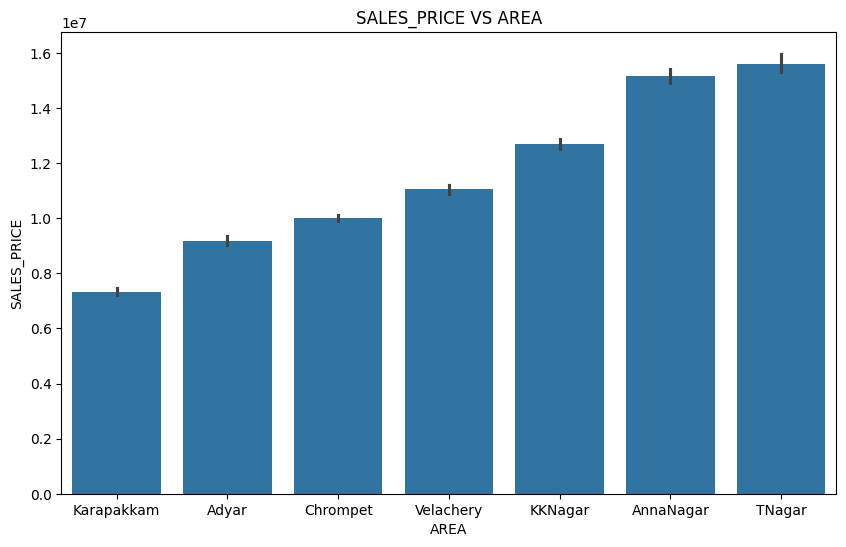

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='AREA',y='SALES_PRICE',data=dataset,order=dataset.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('SALES_PRICE VS AREA')
plt.show()

By observing, AREA is one of the feature which increase the SCALES_PRICE.
One of the important feature in this data.
Which has order.So, We can go with label encoding.
{'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KKNagar':5,'AnnaNagar':6,TNagar':7}

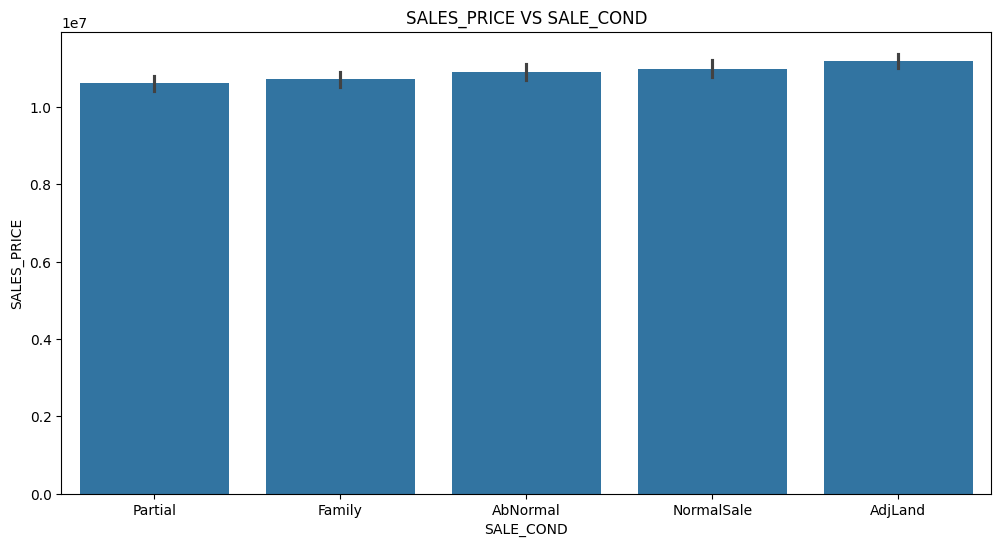

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=dataset,order=dataset.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALES_PRICE VS SALE_COND')

plt.show()

By observing the above plot there is a slight increase depends upon the SALE_COND.There is an order.
We will go with lable encode.
{'Partial':1,'Family':2,'AbNormal':3,'NormalSale':4,'AdjLand':5}

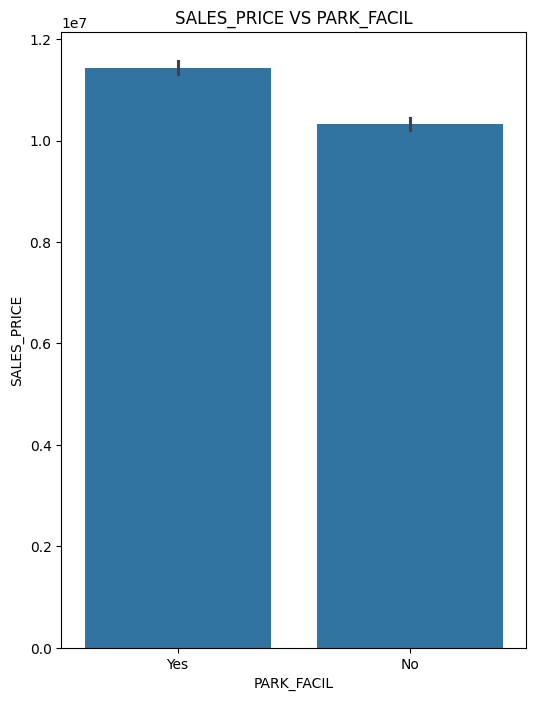

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=dataset)
plt.title('SALES_PRICE VS PARK_FACIL')
plt.show()

Slight decrease in SALES_PRICE if, there is no parking facility.
It's a binary feature.
We can use label encode.

Text(0.5, 1.0, 'SALES_PRICE VS BUILDTYPE WISE')

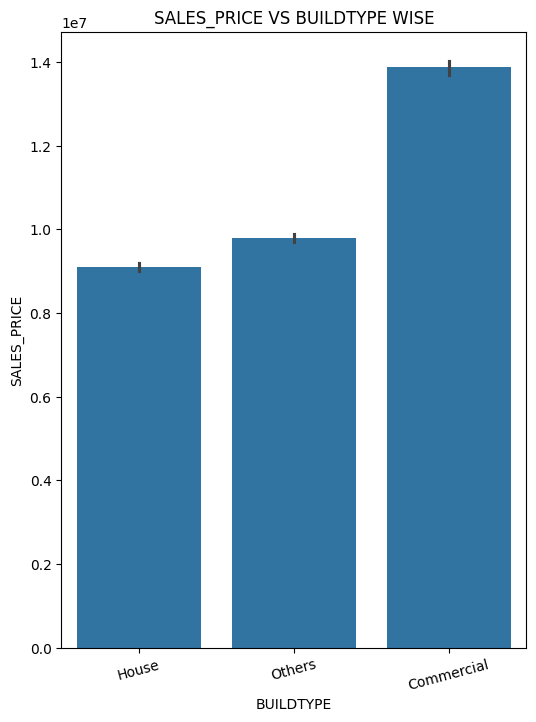

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=dataset,order=dataset.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('SALES_PRICE VS BUILDTYPE WISE')

By observing, Depends on BUILDTYPE, the SALES_PRICE is increasing.
Which have an order house-1,others-2,commerical-3.
We will go with label encode.

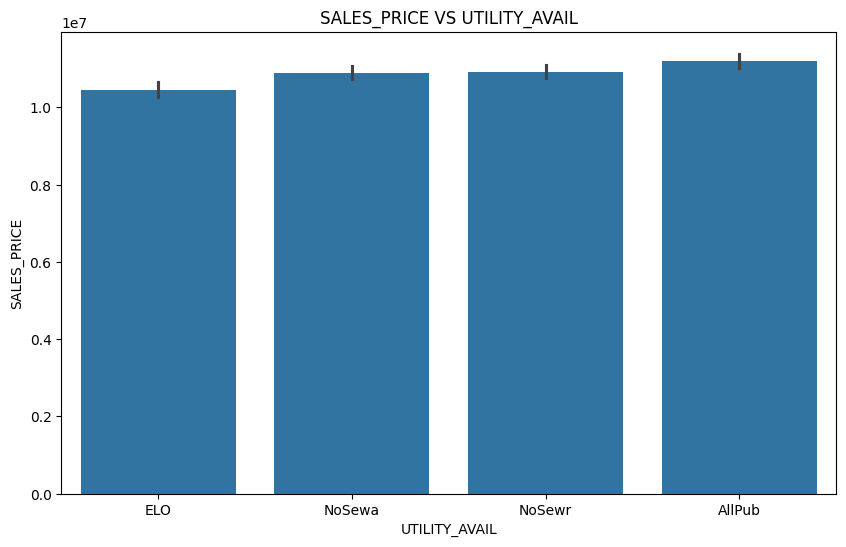

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=dataset,order=dataset.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('SALES_PRICE VS UTILITY_AVAIL')
plt.show()

By observing, Depends on UTILITY_AVAIL, the SALES_PRICE is increasing slightly.
Which have an order ELO-1,NoSewa-2,NoSewr-3,AllPub-4.
We will go with label encode.

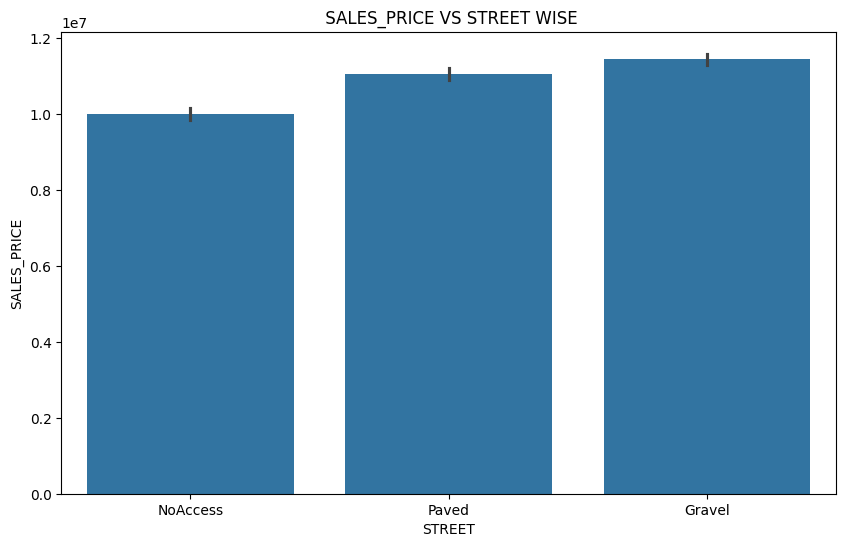

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='STREET',y='SALES_PRICE',data=dataset,order=dataset.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title(' SALES_PRICE VS STREET WISE')
plt.show()

By observing, Depends on STREET, the SALES_PRICE is increasing slightly.
Which have an order NoAccess-1,Paved-2,Gravel-3.
We will go with label encode.

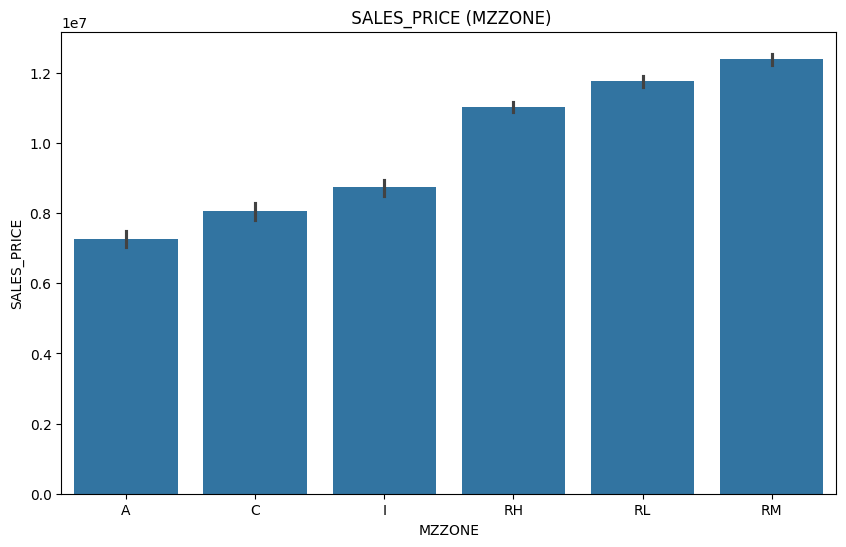

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='MZZONE',y='SALES_PRICE',data=dataset,order=dataset.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title(' SALES_PRICE (MZZONE)')
plt.show()

By observing, Depends on MZZONE, the SALES_PRICE is increasing.
Which have an order A-1, C-2, I-3, RH-4, RL-5,RM-6.
We will go with label encode.

### *OVERALL FEATURE PLOTTING WITH SALE_PRICE:*

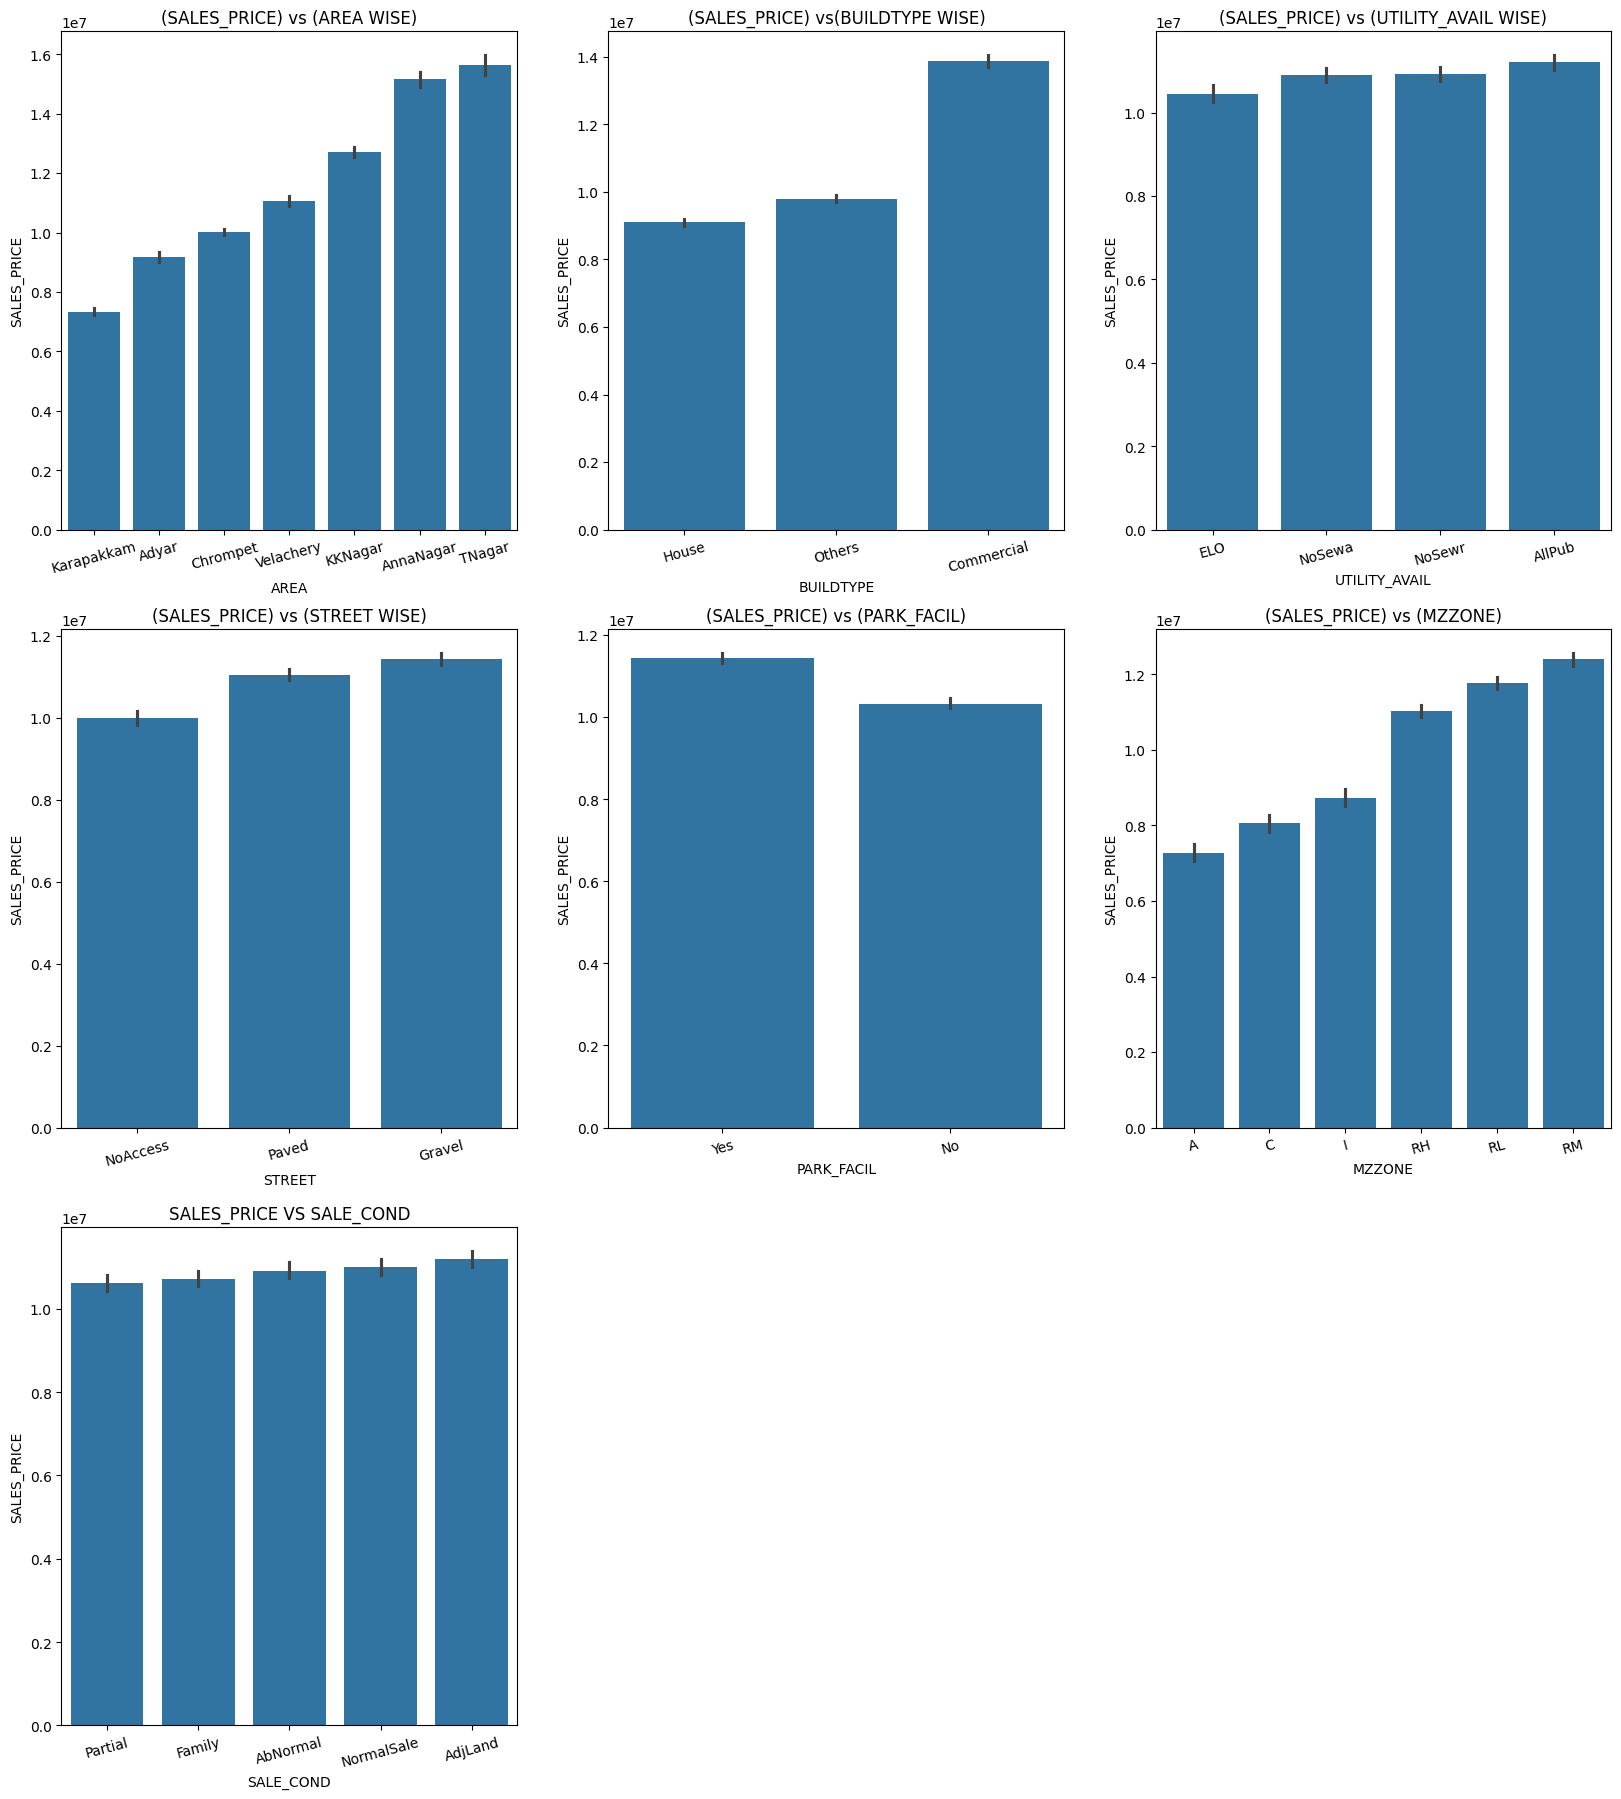

In [ ]:
plt.figure(figsize=(20,22))
plt.subplot(3,3,1)
sns.barplot(x='AREA',y='SALES_PRICE',data=dataset,order=dataset.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (AREA WISE)')
plt.subplot(3,3,2)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=dataset,order=dataset.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs(BUILDTYPE WISE)')
plt.subplot(3,3,3)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=dataset,order=dataset.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (UTILITY_AVAIL WISE)')
plt.subplot(3,3,4)
sns.barplot(x='STREET',y='SALES_PRICE',data=dataset,order=dataset.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (STREET WISE)')
plt.subplot(3,3,5)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=dataset)
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (PARK_FACIL)')
plt.subplot(3,3,6)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=dataset,order=dataset.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('(SALES_PRICE) vs (MZZONE)')
plt.subplot(3,3,7)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=dataset,order=dataset.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.xticks(rotation=15)
plt.title('SALES_PRICE VS SALE_COND')
plt.show()

## *FEATURE ANALYSIS*

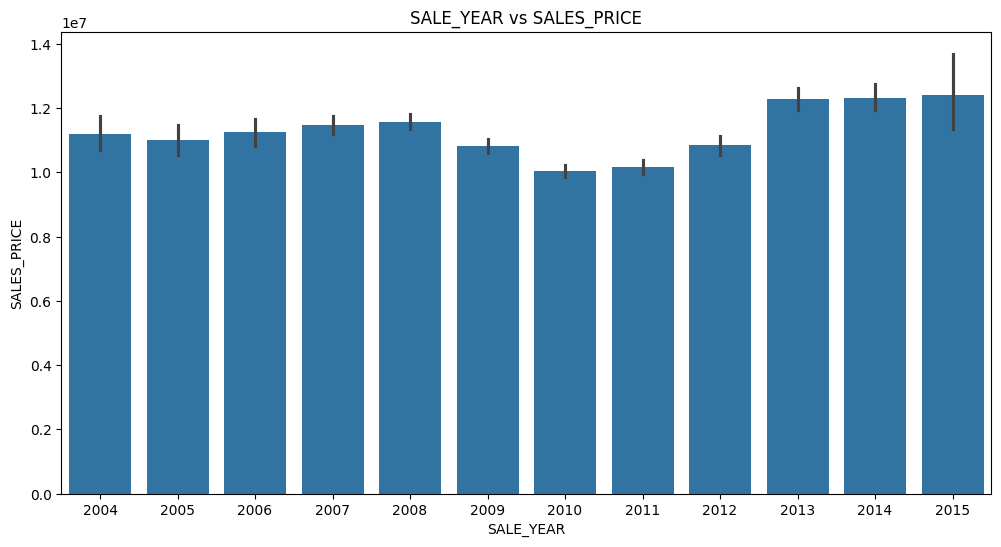

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='SALE_YEAR',y='SALES_PRICE',data=dataset)
plt.title('SALE_YEAR vs SALES_PRICE')
plt.show()

This plot shows us slight increase decrease b/w 2004 to 2008.
Then, drop occur in 2009 and slightly increase in 2012.
Then, 2013 to 2015 it maintain high sales price in 2013 to 2015.
2015 is the year which have highest sales price.
This shows year by year there is a increase in sales_price

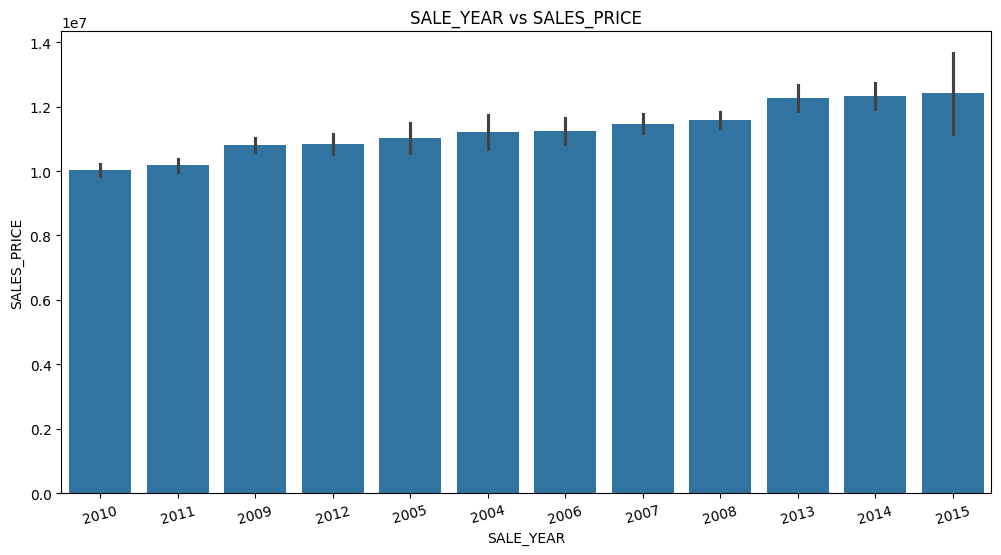

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='SALE_YEAR',y='SALES_PRICE',data=dataset,order=dataset.groupby('SALE_YEAR')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_YEAR'])
plt.xticks(rotation=15)
plt.title('SALE_YEAR vs SALES_PRICE')
plt.show()

This plot shows the ordered sales price in sale yearwise.

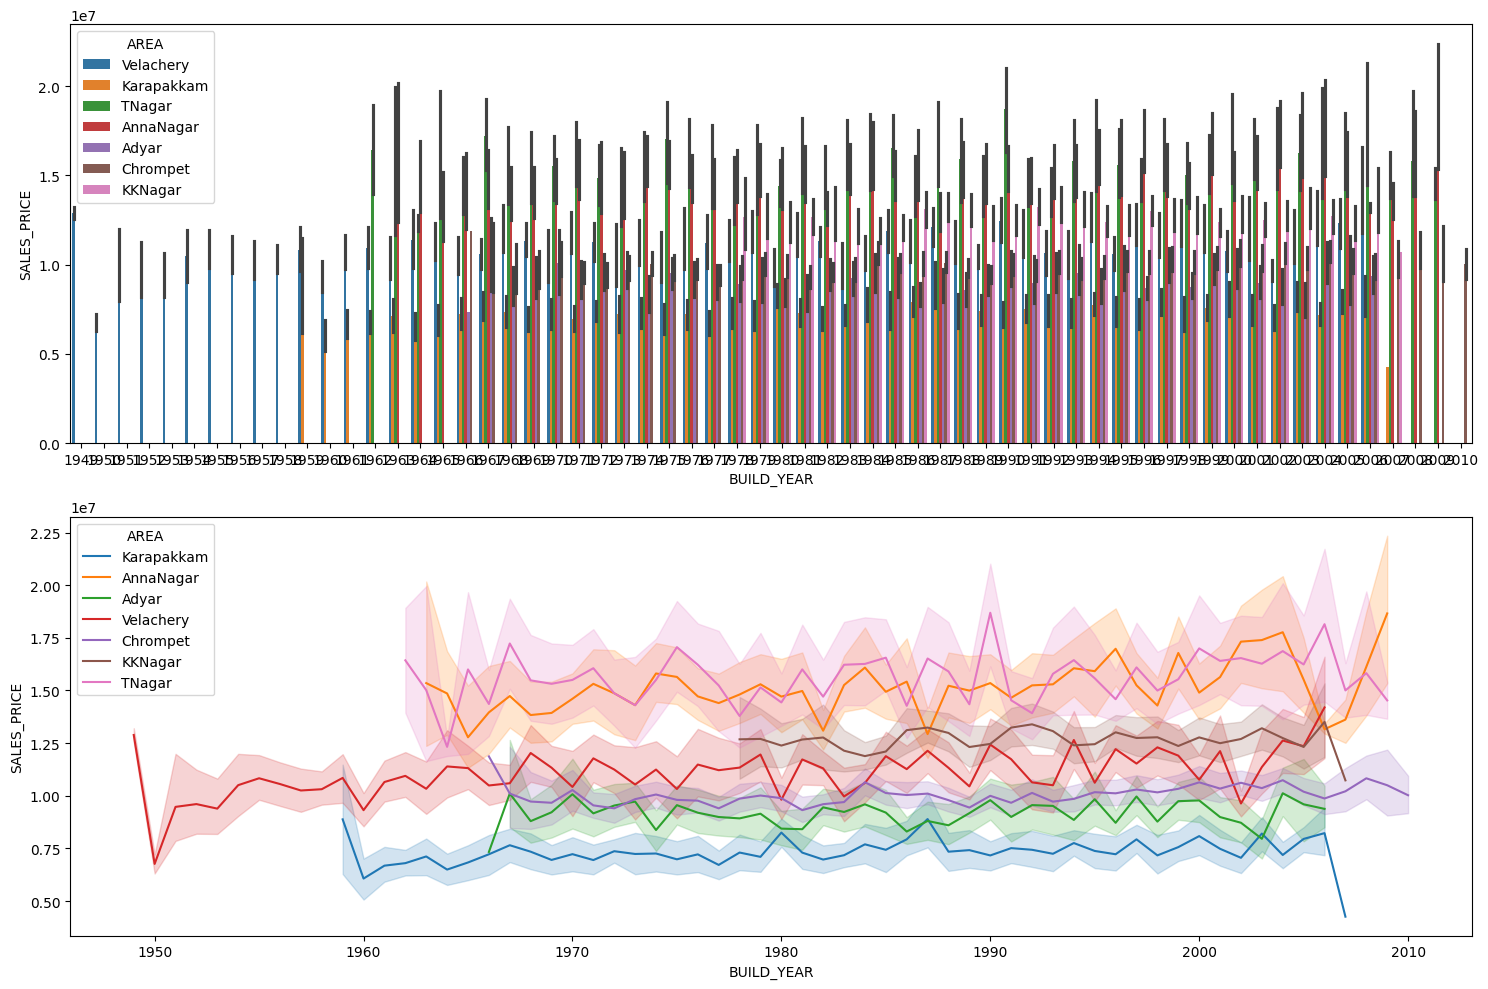

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.barplot(x = "BUILD_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.subplot(2,1,2)
sns.lineplot(x = "BUILD_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')
plt.tight_layout()
plt.show()

## *OBSERVATION:*

KARAPPAKKAM:
Minimum sales price in karappakkam.The build year is b/w 1959 to 2008.There is some rise up and down in sales price.

ANNANAGAR:
Annanagar is one of the best sales price. The build year is b/w 1963 to 2010.
There is some rise up and down in sales price.It ends with high range.

ADYAR:
Adyar is the second lowest sales price. The build year is b/w 1965 to 2008.
There is some rise up and down in sales price.

VELACHERY:
Velachery is starts with nice range and end with also good range.e build year is b/w 1950 to 2008.There is some rise up and down in sales price.It ends with high range.

CHROMPET:
Chrompet is also like adyar. The build year is b/w 1965 to 2010.It start with rise but end with fall in sales price.

KKNAGAR:
KKNagar is also one of the good profitable area.The build is b/w 1979 to 2009.
There is some rise up and down in sales price.

TNAGAR:
TNagar is one of the best area in chennai for realestate.
the build year is b/w 1960 to 2010.It gives profitable price.




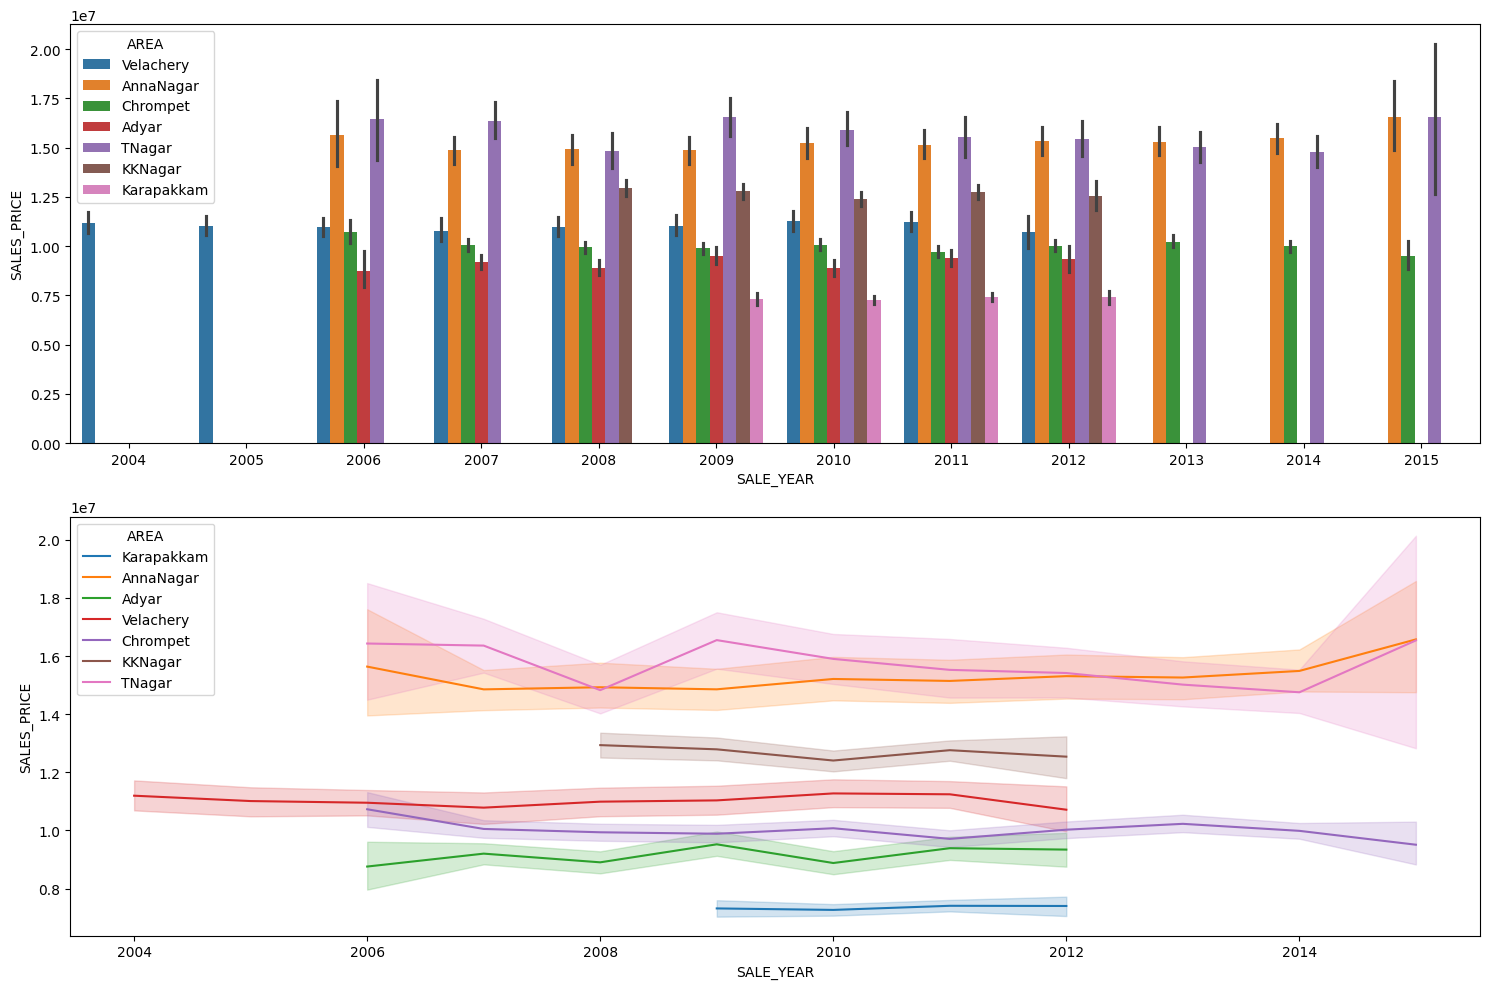

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.barplot(x = "SALE_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.subplot(2,1,2)
sns.lineplot(x = "SALE_YEAR", y = dataset["SALES_PRICE"].values, data = dataset,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.tight_layout()
plt.show()

## *OBSERVATION:*

KARAPPAKKAM:
Minimum profitable area is karappakkam, it doesn't maintain the consistency in sale year.

ANNANAGAR:
AnnaNagar looks profitable area.Huge sales price consistency .
It is one of the best profitable area in chennai using the above plot.

ADYAR:
Adyar maintain the consistency in both saleprice and salesyear but it is only  b/w 2006 to 2012.

VELACHERY:
In, 2004 and 2005 velachery is the only sold area.
Velachery also maintain the consistency in both saleprice and salesyear but this one is only b/w 2004 to 2012 as similar as adyar.

CHROMPET:
Chrompet shows average growth in salesprice.
It maintain the consistency.

KKNAGAR:
KKNagar good in saleprice but sales year only occurred b/w 2008 to 2012.

TNAGAR:
First huge sales price consistency occur in TNagar.TNagar is one of the best profitable area in chennai using the above plot.

Maintaing high consistency in both salesprice and saleyear are **TNagar, AnnaNagar and Chrompet**.This areas are may give a huge profit for us in future days.



## *RELATIONSHIP B/W FEATURES AND TARGET:*

In [ ]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,AGE
count,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7061.000000,7.061000e+03,7061.000000,7061.000000,7061.000000
mean,1381.338479,99.583487,1.636312,1.213001,3.686730,3.516910,3.505764,3.485186,3.503254,1.088844e+07,1985.489874,2009.766605,24.276731
std,457.785335,57.405192,0.803502,0.409457,1.019849,0.892244,0.897499,0.887059,0.527223,3.768319e+06,12.648207,2.206717,12.331248
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,1949.000000,2004.000000,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.268875e+06,1976.000000,2008.000000,14.000000
50%,1370.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.032070e+07,1986.000000,2010.000000,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298015e+07,1996.000000,2011.000000,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,2010.000000,2015.000000,55.000000


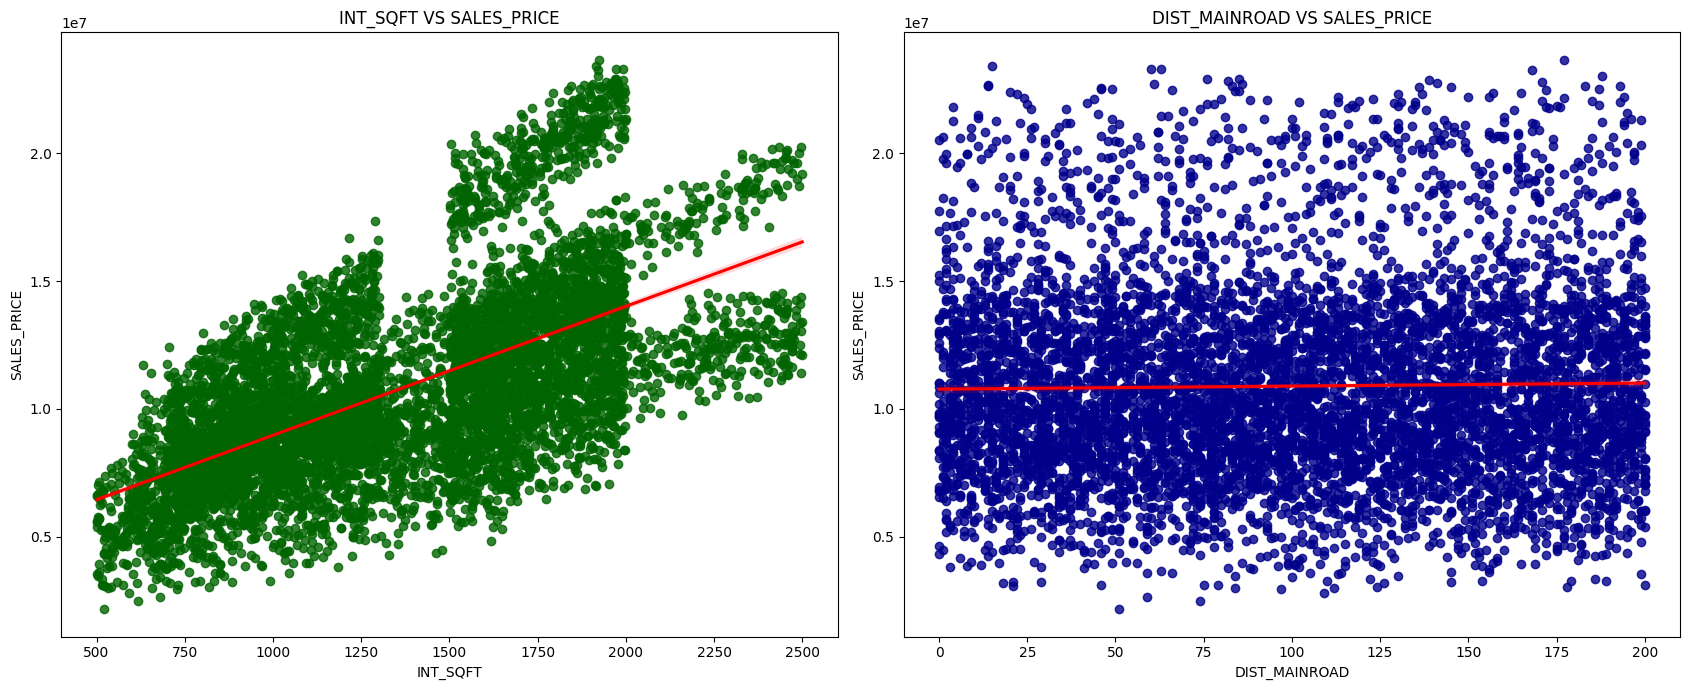


              INT_SQFT  SALES_PRICE
INT_SQFT     1.000000     0.612747
SALES_PRICE  0.612747     1.000000

                DIST_MAINROAD  SALES_PRICE
DIST_MAINROAD       1.000000     0.018269
SALES_PRICE         0.018269     1.000000


In [ ]:
plt.figure(figsize=(17,7))

plt.subplot(121)
sns.regplot(x=dataset['INT_SQFT'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkgreen'},line_kws={'color':'red'})
plt.title('INT_SQFT VS SALES_PRICE')

plt.subplot(122)
sns.regplot(x=dataset['DIST_MAINROAD'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('DIST_MAINROAD VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',dataset[['INT_SQFT','SALES_PRICE']].corr())
print('\n',dataset[['DIST_MAINROAD','SALES_PRICE']].corr())

BY OBSERVING ABOVE PLOTS AND CORR:
We came to know,
INT_SQFT have good relation and have good linear relation with SALES_PRICE.
DIST_MAINROAD doesn't have relation and linear relation with SALES_PRICE.
So, we gonna drop the DIST_MAINROAD.

In [ ]:
dataset=dataset.drop(['DIST_MAINROAD'],axis=1)

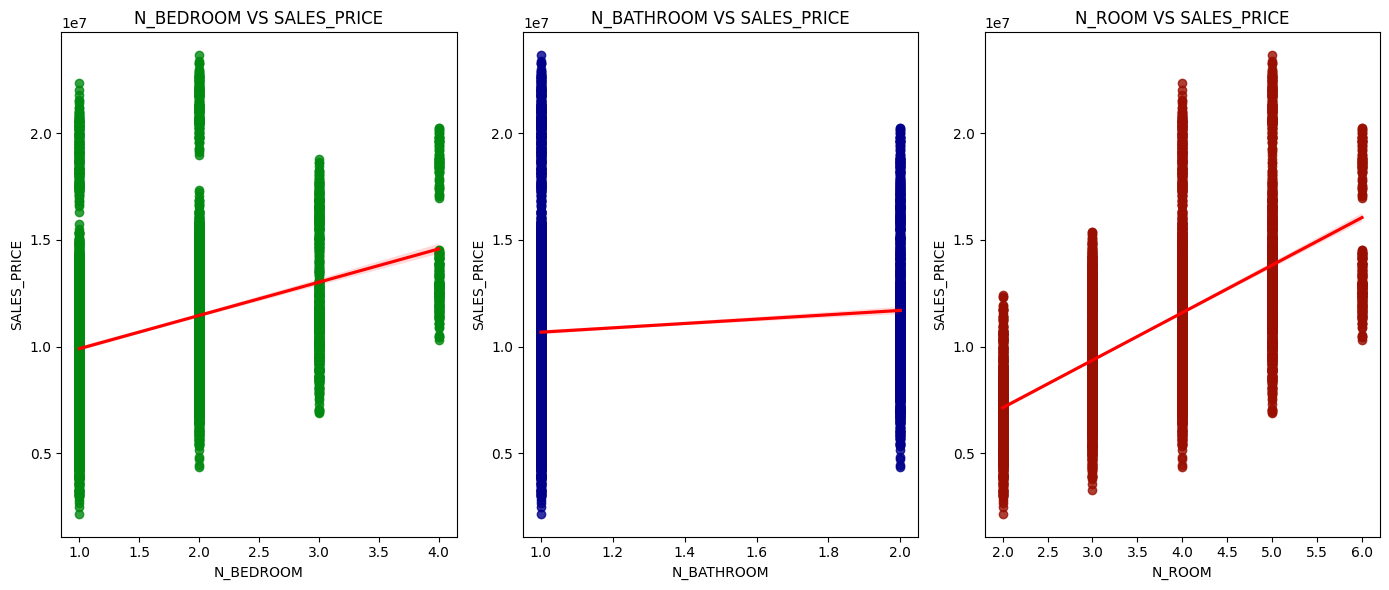


              N_BEDROOM  SALES_PRICE
N_BEDROOM     1.000000     0.332609
SALES_PRICE   0.332609     1.000000

              N_BATHROOM  SALES_PRICE
N_BATHROOM     1.000000     0.110896
SALES_PRICE    0.110896     1.000000

               N_ROOM  SALES_PRICE
N_ROOM       1.00000      0.60352
SALES_PRICE  0.60352      1.00000


In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(131)
sns.regplot(x=dataset['N_BEDROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#02890F'},line_kws={'color':'red'})
plt.title('N_BEDROOM VS SALES_PRICE')

plt.subplot(132)
sns.regplot(x=dataset['N_BATHROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('N_BATHROOM VS SALES_PRICE')

plt.subplot(133)
sns.regplot(x=dataset['N_ROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#990F02'},line_kws={'color':'red'})
plt.title('N_ROOM VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',dataset[['N_BEDROOM','SALES_PRICE']].corr())
print('\n',dataset[['N_BATHROOM','SALES_PRICE']].corr())
print('\n',dataset[['N_ROOM','SALES_PRICE']].corr())

BY OBSERVING ABOVE PLOTS AND CORR:
We came to know,
N_BEDROOM AND N_ROOM have relationship and linear relationship too with SALES_PRICE.
N_BATHROOM have very slight small relationship but there is no linear relationship with SALES_PRICE.Let's try some transform.

In [ ]:
dataset['TRANS_N_BATHROOM']  = np.log(dataset['N_BATHROOM'])
print(dataset[['TRANS_N_BATHROOM','SALES_PRICE']].corr())
dataset=dataset.drop(['TRANS_N_BATHROOM'],axis=1)

                  TRANS_N_BATHROOM  SALES_PRICE
TRANS_N_BATHROOM          1.000000     0.110896
SALES_PRICE               0.110896     1.000000


Every transform is failed over here.There is no linear relation in N_BATHROOM.Let's consider as linear.

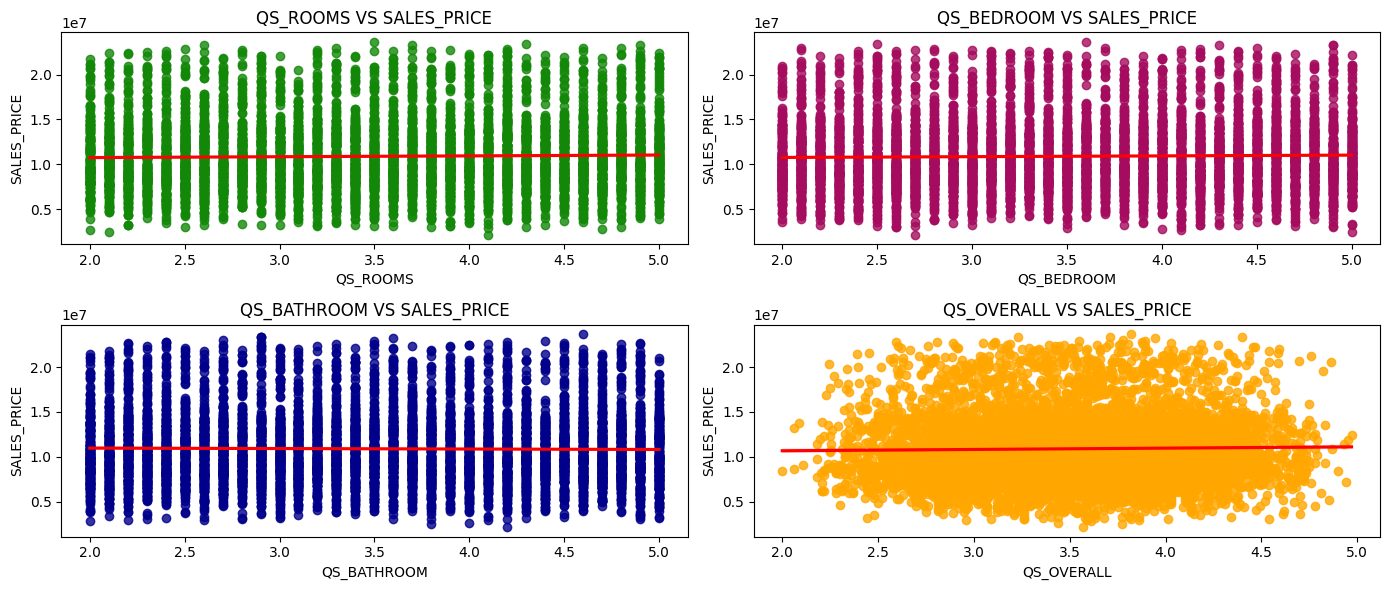


              QS_ROOMS  SALES_PRICE
QS_ROOMS     1.000000     0.022275
SALES_PRICE  0.022275     1.000000

              QS_BEDROOM  SALES_PRICE
QS_BEDROOM     1.000000     0.020413
SALES_PRICE    0.020413     1.000000

              QS_BATHROOM  SALES_PRICE
QS_BATHROOM     1.000000    -0.012363
SALES_PRICE    -0.012363     1.000000

              QS_OVERALL  SALES_PRICE
QS_OVERALL     1.000000     0.020556
SALES_PRICE    0.020556     1.000000


In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(221)
sns.regplot(x=dataset['QS_ROOMS'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#138808'},line_kws={'color':'red'})
plt.title('QS_ROOMS VS SALES_PRICE')

plt.subplot(222)
sns.regplot(x=dataset['QS_BEDROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#A50B5E'},line_kws={'color':'red'})
plt.title('QS_BEDROOM VS SALES_PRICE')

plt.subplot(223)
sns.regplot(x=dataset['QS_BATHROOM'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('QS_BATHROOM VS SALES_PRICE')

plt.subplot(224)
sns.regplot(x=dataset['QS_OVERALL'],y=dataset['SALES_PRICE'],scatter_kws={'color':'#FFA700'},line_kws={'color':'red'})
plt.title('QS_OVERALL VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',dataset[['QS_ROOMS','SALES_PRICE']].corr())
print('\n',dataset[['QS_BEDROOM','SALES_PRICE']].corr())
print('\n',dataset[['QS_BATHROOM','SALES_PRICE']].corr())
print('\n',dataset[['QS_OVERALL','SALES_PRICE']].corr())

BY OBSERVING ABOVE PLOTS AND CORR:
We came to know,
There is no relationship and there is no linear relation at all in all with SALES_PRICE.
QS_ROOMS, QS_BEDROOM, QS_BATHROOM and QS_OVERALL.
So, we gonna drop all 4 columns.

In [ ]:
dataset=dataset.drop(['QS_ROOMS', 'QS_BEDROOM', 'QS_BATHROOM','QS_OVERALL'],axis=1)

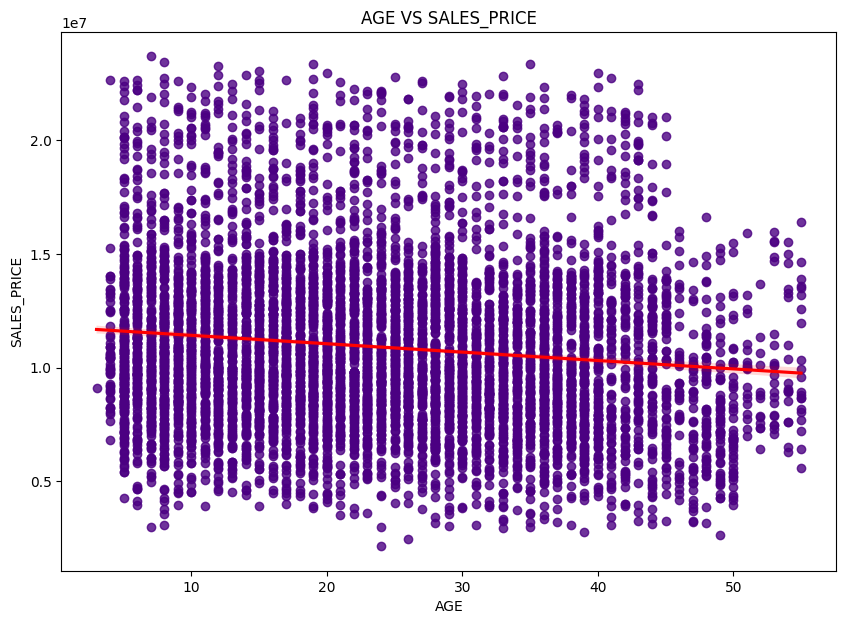

                  AGE  SALES_PRICE
AGE          1.000000    -0.120544
SALES_PRICE -0.120544     1.000000


In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(x=dataset['AGE'],y=dataset['SALES_PRICE'],scatter_kws={'color':'indigo'},line_kws={'color':'red'})
plt.title('AGE VS SALES_PRICE')
plt.show()

print(dataset[['AGE','SALES_PRICE']].corr())

BY OBSERVING THE ABOVE PLOT AND CORR:
We came to know,
There is a slight relationship and slight near to linear relationship in AGE with SALES_PRICE.

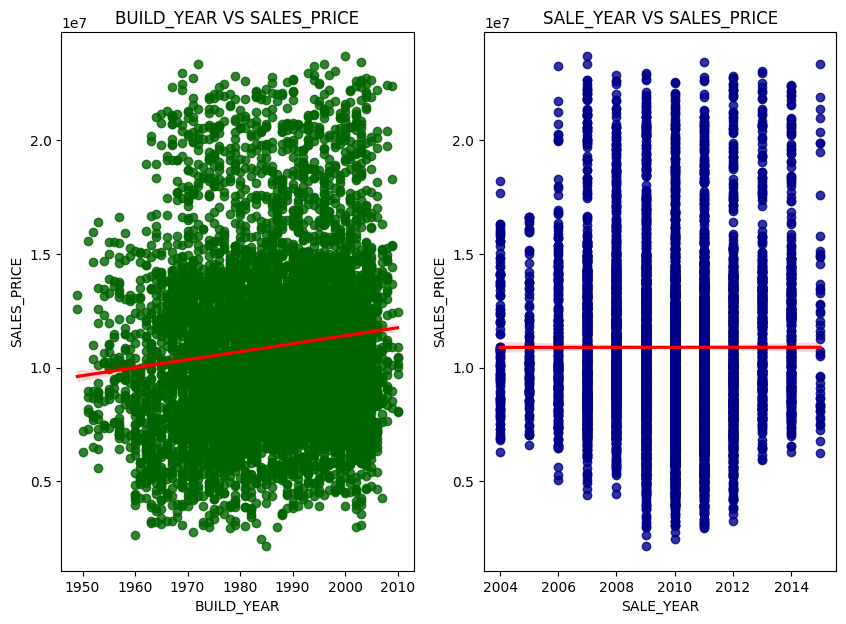


              BUILD_YEAR  SALES_PRICE
BUILD_YEAR     1.000000     0.117587
SALES_PRICE    0.117587     1.000000

              SALE_YEAR  SALES_PRICE
SALE_YEAR     1.000000     0.000368
SALES_PRICE   0.000368     1.000000


In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(121)
sns.regplot(x=dataset['BUILD_YEAR'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkgreen'},line_kws={'color':'red'})
plt.title('BUILD_YEAR VS SALES_PRICE')

plt.subplot(122)
sns.regplot(x=dataset['SALE_YEAR'],y=dataset['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('SALE_YEAR VS SALES_PRICE')
plt.show()

print('\n',dataset[['BUILD_YEAR','SALES_PRICE']].corr())
print('\n',dataset[['SALE_YEAR','SALES_PRICE']].corr())


BY OVSERVING THE ABOVE PLOT AND CORR:
We came to know,
BUILD_YEAR have relation and near to linear relation with SALES_PRICE.
SALE_YEAR have no relation and no linear relation with SALES_PRICE.Let's drop the column.

In [ ]:
dataset=dataset.drop(['SALE_YEAR'],axis=1)

Here, We finished the EDA part.Let's move with Encoding part.


## *ANALYSING THE SALES PRICE:*

**BUILDTYPE SALES PRICEWISE MIN,AVG,MAX**

In [ ]:
buildtype_fltr_C = dataset['BUILDTYPE']=='Commercial'
commercial=dataset.loc[buildtype_fltr_C]
min = commercial['SALES_PRICE'].min()
median = commercial['SALES_PRICE'].median()
max = commercial['SALES_PRICE'].max()
index=['Minimun_Sales_Price','Mean_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,median,max],columns=['Commercial'],index=index)

buildtype_fltr_H = dataset['BUILDTYPE']=='House'
House=dataset.loc[buildtype_fltr_H]
min = House['SALES_PRICE'].min()
mean= House['SALES_PRICE'].mean()
median = House['SALES_PRICE'].median()
max = House['SALES_PRICE'].max()
house = pd.DataFrame([min,mean,median,max],columns=['House'],index=index)

buildtype_fltr_O = dataset['BUILDTYPE']=='Others'
Others=dataset.loc[buildtype_fltr_O]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
median = Others['SALES_PRICE'].median()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,median,max],columns=['Others'],index=index)

Buildtype_mmm = pd.concat([comm,house,others],axis=1)
Buildtype_mmm = pd.DataFrame(Buildtype_mmm.T)
Buildtype_mmm["Build_type"]=["Commercial","House","Others"]

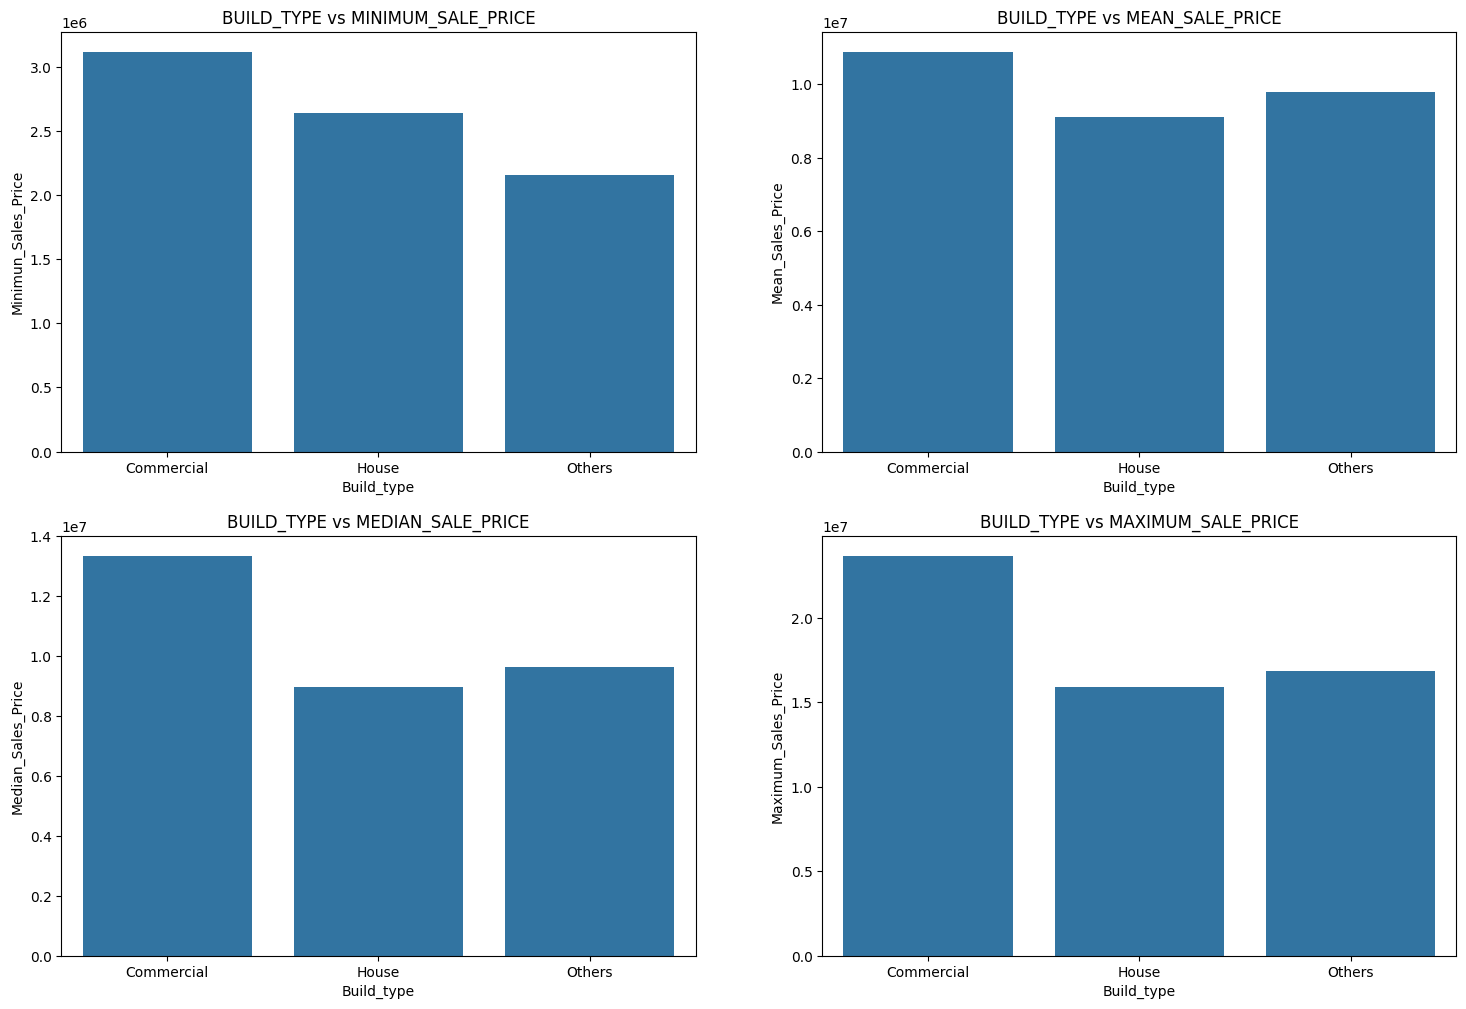

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Mean_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MEAN_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Median_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()

COMMERCIAL:
Commercial takes first place in every plot ( mean,median,min and max )sales price.
Commercial dominates everywhere.
Minimum sales price took large amount of commercial.Then max,mean and median.

HOUSE:
House takes last place in max,mean and mode of sales price.
In minimum sales price it was in second place.
High amount of House occur in Minimum sales price

OTHERS:
Others maintain the average in every plot (mean,median,min and max) sales price.
In mean sales price it was similar to commercial one.
High amount of others occur in Minimum sales price


Commercial type is the best one for sellers.

**AREA SALES PRICEWISE MIN,AVG,MAX**

In [ ]:
mean=dataset.groupby('AREA')['SALES_PRICE'].mean()
mean_=mean.values
max=dataset.groupby('AREA')['SALES_PRICE'].max()
max_=max.values
min=dataset.groupby('AREA')['SALES_PRICE'].min()
min_=min.values
median=dataset.groupby('AREA')['SALES_PRICE'].median()
median_=min.values
Area_mmm=pd.DataFrame([min_,mean_,median_,max_],columns=mean.index,index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']).T
Area_mmm["AREA"]=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

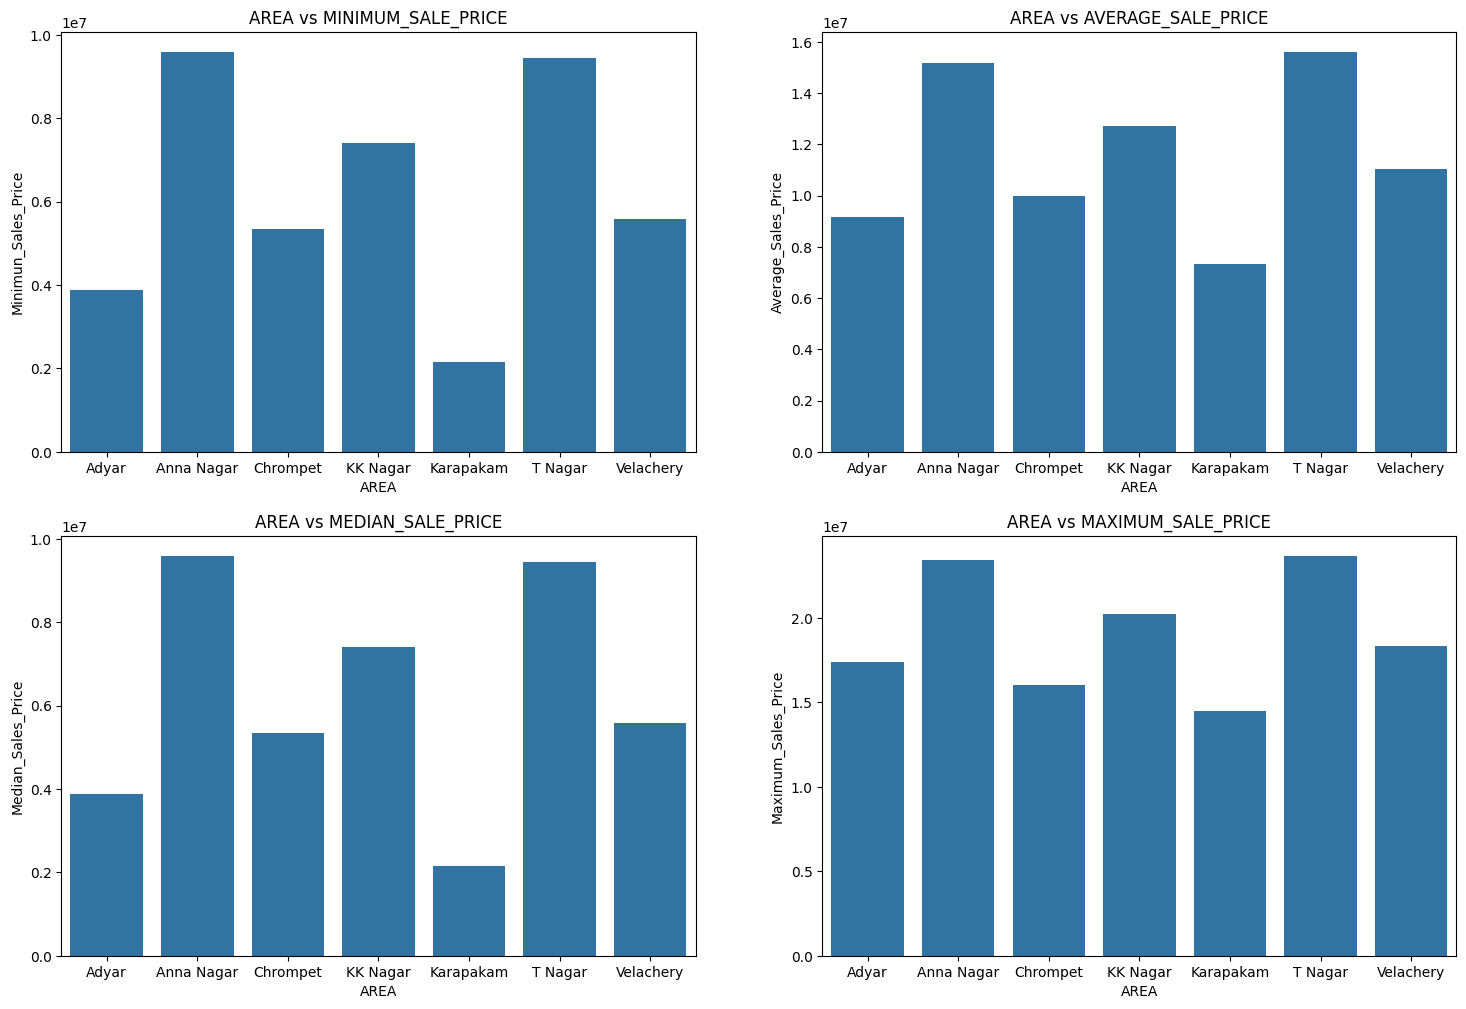

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x='AREA',y='Minimun_Sales_Price',data=Area_mmm)
plt.title('AREA vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x='AREA',y='Average_Sales_Price',data=Area_mmm)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x='AREA',y='Median_Sales_Price',data=Area_mmm)
plt.title('AREA vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x='AREA',y='Maximum_Sales_Price',data=Area_mmm)
plt.title('AREA vs MAXIMUM_SALE_PRICE')
plt.show()

MINIMUN SALES PRICE:
The order of minimum sales price from low to high is as follows,
  Karapakam,Adyar,Chrompet,Velachery,KK Nagar,TNagar and AnnaNagar.
Annanagar is the highest one in minimum sales price.

AVEREAGE SALES PRICE:
The order of average sales price from low to high is as follows,
  Karapakam,Adyar,Chrompet,Velachery,KK Nagar,Annanagar and TNagar.
TNagar is the highest one in Average sales price.

MEDIAN SALES PRICE:
The order of median sales price from low to high is as follows,
  Karapakam,Adyar,Chrompet,Velachery,KK Nagar,TNagar and AnnaNagar.
Annanagar is the highest one in median sales price.

MAXIMUM SALES PRICE:
The order of maximum sales price from low to high is as follows,
  Karapakam,Chrompet,Adyar,Velachery,KKNagar,Annanagar and TNagar.
TNagar is the highest one in maximum sales price.

TNagar and Annanagar is the best place for the sellers.
Moreover KKNagar maintain the consistency.

In [ ]:
mean=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

mmm_df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']
mmm__df = pd.DataFrame(mmm_df)
mmm__df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mmm__df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mmm__df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

**SALES PRICE OF EACH BUILDTYPE WITH AREA**

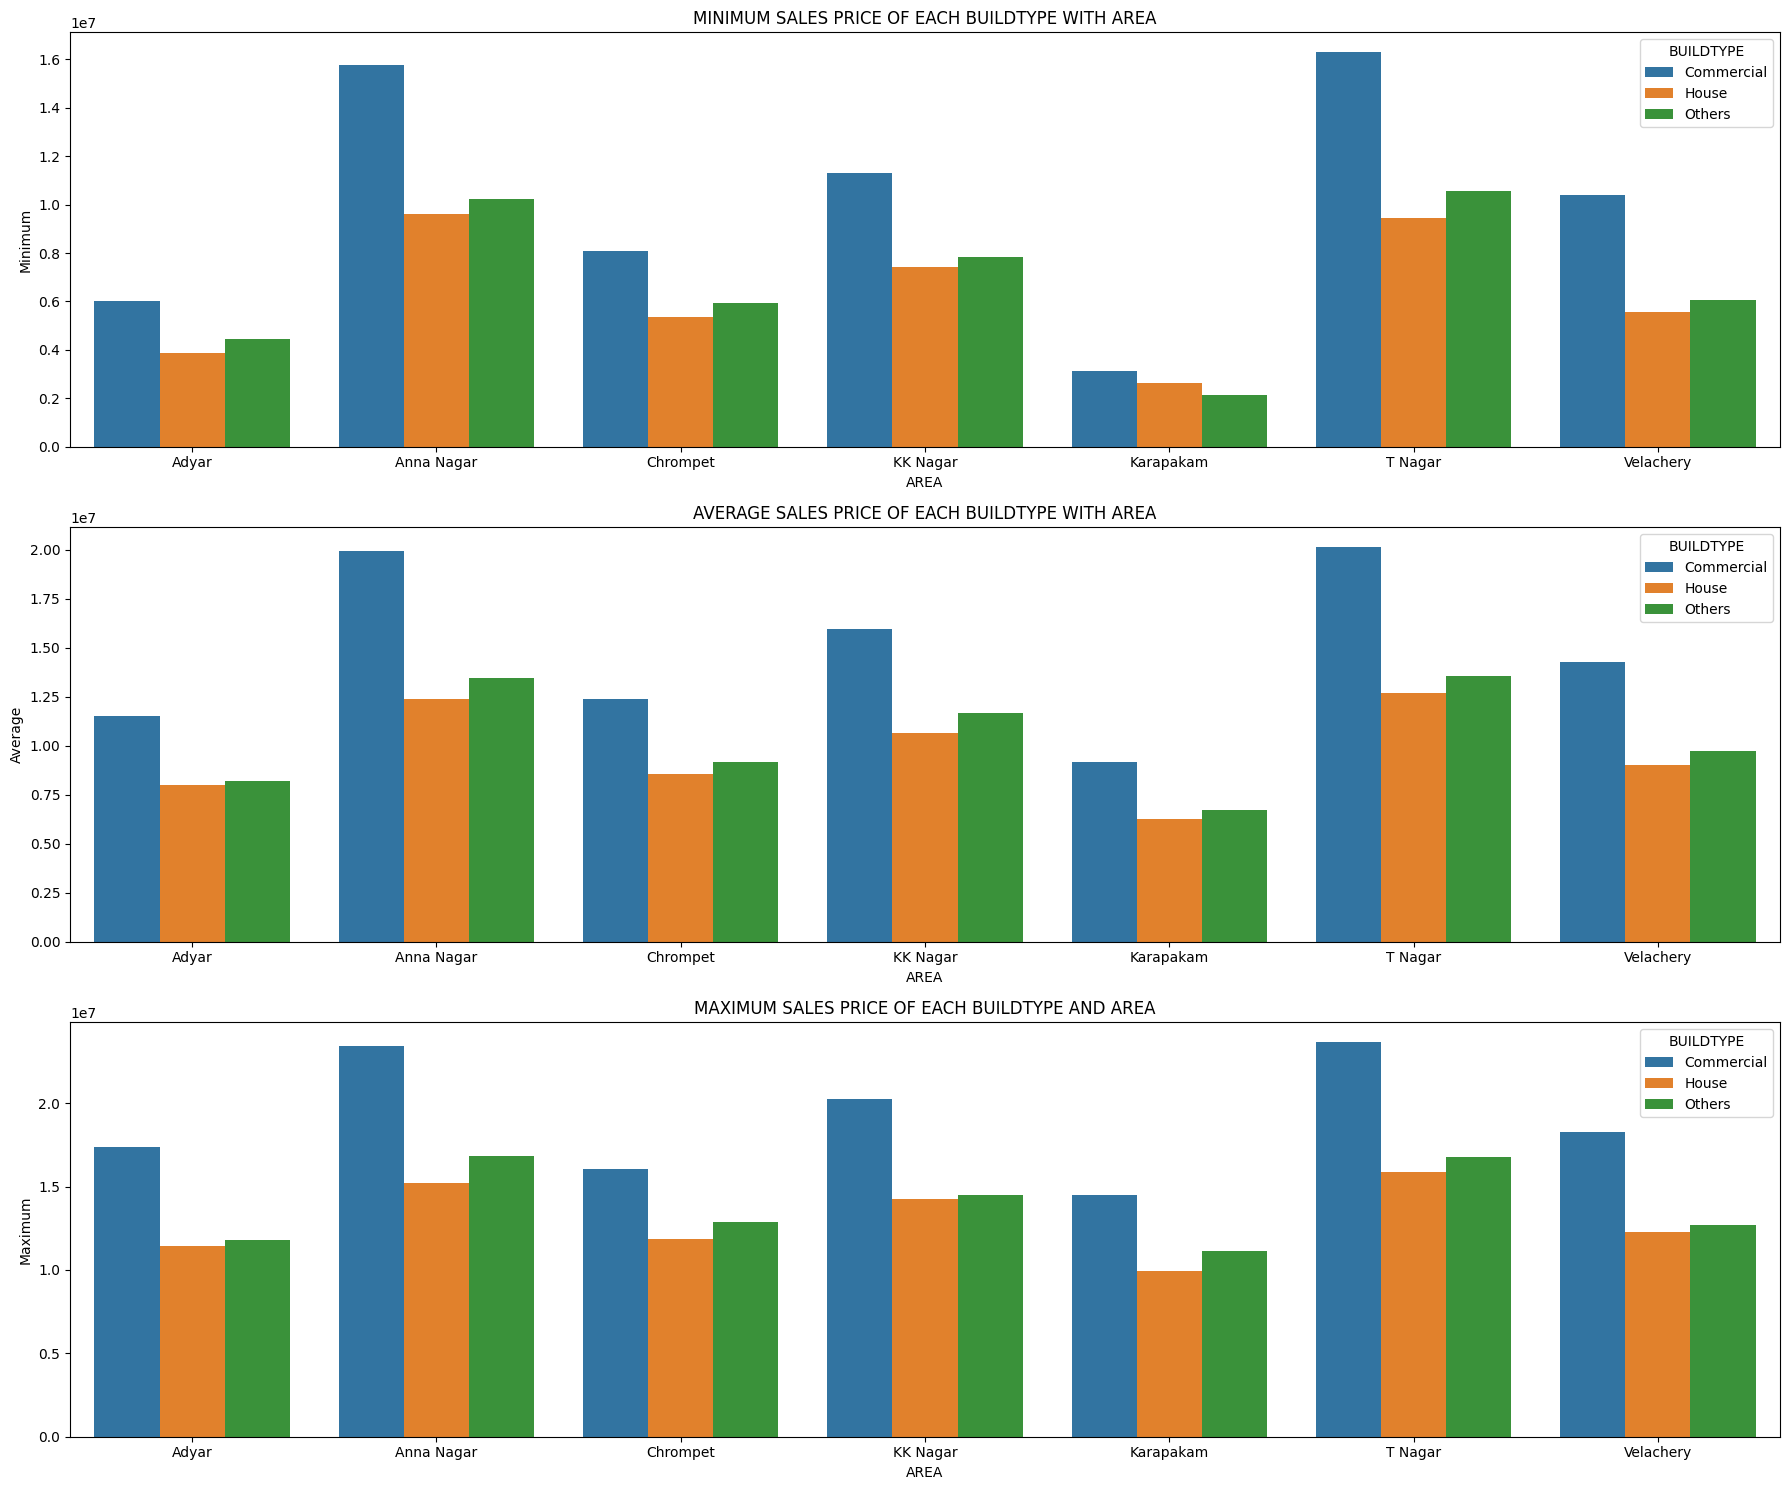

In [ ]:
plt.figure(figsize=(18,15))

plt.subplot(311)
sns.barplot(x='AREA',y='Minimum',data=mmm__df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE WITH AREA')

plt.subplot(312)
sns.barplot(x='AREA',y='Average',data=mmm__df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE WITH AREA')

plt.subplot(313)
sns.barplot(x='AREA',y='Maximum',data=mmm__df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')

plt.tight_layout()
plt.show()

HIGH: TNagar and Annanagar have the hight level of sales price.
Beacause,commercial type build occurs more than others that's why that area dominates in sales price everywhere.

AVERAGE: KKNagar,Velachery and Chrompet have the average level of sales price.

LOW: Karapakkam and Adyar have low sales price.

## **ENCODE**

COLUMNS FOR ENCODE:
    ['AREA', 'INT_SQFT','SALE_COND','PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']

In [ ]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'BUILD_YEAR', 'AGE'],
      dtype='object')

In [ ]:
dataset.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILD_YEAR,AGE
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,1967,44
1,AnnaNagar,1986,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,1995,11
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,1992,20
3,Velachery,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,1988,22
4,Karapakkam,1226,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,1979,30


In [ ]:
dataset['AREA']=dataset['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KKNagar':5,'AnnaNagar':6,'TNagar':7})
dataset['SALE_COND']=dataset['SALE_COND'].map({'Partial':1,'Family':2,'AbNormal':3,'NormalSale':4,'AdjLand':5})
dataset['PARK_FACIL']=dataset['PARK_FACIL'].map({'Yes':1,'No':0})
dataset['BUILDTYPE']=dataset['BUILDTYPE'].map({'House':1,'Others':2,'Commercial':3})
dataset['UTILITY_AVAIL']=dataset['UTILITY_AVAIL'].map({'ELO':1,'NoSewa':2,'NoSewr':3,'AllPub':4})
dataset['STREET']=dataset['STREET'].map({'NoAccess':1,'Paved':2,'Gravel':3})
dataset['MZZONE']=dataset['MZZONE'].map({ 'A':1, 'C':2, 'I':3, 'RH':4, 'RL':5,'RM':6})
dataset.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILD_YEAR,AGE
0,1,1004,1,1,3,3,1,3,4,2,1,7600000,1967,44
1,6,1986,2,1,5,3,0,3,4,3,4,21717770,1995,11
2,2,909,1,1,3,3,1,3,1,3,5,13159200,1992,20
3,4,1855,3,2,5,2,0,2,3,2,3,9630290,1988,22
4,1,1226,1,1,3,3,1,2,4,3,2,7406250,1979,30


## **TARGET AND FEATURE SELCTION:**

In [ ]:
dataset.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'BUILD_YEAR', 'AGE'],
      dtype='object')

In [ ]:
#FEATURES
X=dataset[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL',
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE']].values
#TARGET
Y=dataset['SALES_PRICE'].values

## **SPLITING**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

## **SCALING**

Scaling is mandatory for KNN.
Scaling is not mandatory for linear regression,Decision tree and Random forest. but it was good practice to do.Here, i gonna scale the data using StandardScaler for all the model.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **LINEAR REGRESSION MODEL**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

### *TEST*

In [ ]:
y_test=Y_test
y_pred = lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,1.315175e+07
1,16053550,1.680500e+07
2,18670480,1.724624e+07
3,6468090,6.096236e+06
4,10732635,1.035751e+07
...,...,...
1408,10441050,9.363275e+06
1409,8595550,1.025218e+07
1410,10721350,1.074093e+07
1411,12114895,1.100394e+07


## *CO-EFFICIENT*

In [ ]:
coeff_df = pd.DataFrame(lr.coef_,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL',
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE'], columns=['Coefficient'])
y_pred = lr.predict(X_test)
coeff_df

,Coefficient
AREA,1.071259e+06
INT_SQFT,6.411576e+05
N_BEDROOM,-1.255770e+06
N_BATHROOM,1.032030e+05
N_ROOM,1.770573e+06
SALE_COND,2.045372e+05
PARK_FACIL,5.059074e+05
BUILDTYPE,1.906253e+06
UTILITY_AVAIL,8.277045e+04
STREET,3.898557e+05


## *INTERCEPT*

In [ ]:
lr.intercept_

10905607.450424928

## *EVALUATION METRIC*

In [ ]:
print('R2- SCORE:', metrics.r2_score(y_test,lr.predict(X_test)))

R2- SCORE: 0.8810555424666483


## *EQUATION OF LINEAR REGRESSION:*

Y=mX+c
where,
Y - Target variable
X - Features
m - Coefficient
c - Intercept

*'SALES_PRICE'= ('AREA')1071258.804071025+('INT_SQFT')641157.5565530059+('N_BEDROOM')-1255769.5051231966+('N_BATHROOM')103202.95084784742+(N_ROOM')1770573.0695779352+(SALE_COND')204537.15129330553+(PARK_FACIL')505907.4297993424+('BUILDTYPE')1906253.1406325016+(UTILITY_AVAIL')82770.4525548401+(STREET')389855.65352743265+('MZZONE')887054.0661549694+('BUILD_YEAR)-256023.59834418155+('AGE')-466670.2668845074+ 10905607.450424928 *


## **KNN**

In [ ]:
def knn_comparison(data, k):
  x=X_train
  y=Y_train
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, Y_train)
  print("Train Accuracy : ", knn.score(X_train,Y_train))
  print("Val Accuracy : ", np.mean(cross_val_score(knn, X_train, Y_train, cv=10)))
  plot_decision_regions(X_train, Y_train, knn=knn, legend=2)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Knn with K='+ str(k))
  plt.show()

def knn_no_plot(data, k):
  x=X_train
  y=Y_train
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(x, y)
  print("K : ", k, " Train Accuracy : ", knn.score(x,y), " Val Accuracy : ", np.mean(cross_val_score(knn, x, y, cv=5)))

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,50]:
  knn = KNeighborsRegressor(i)
  knn.fit(X_train,Y_train)
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train, Y_train, cv=10)))

K value  :  1  score :  0.8863428993211573
K value  :  2  score :  0.9124740100386151
K value  :  3  score :  0.916594529057422
K value  :  4  score :  0.9181697610615739
K value  :  5  score :  0.9163427130830103
K value  :  6  score :  0.9169143883201085
K value  :  7  score :  0.9151835722974735
K value  :  8  score :  0.9130950273194344
K value  :  9  score :  0.912100476107498
K value  :  10  score :  0.9106227874901378
K value  :  20  score :  0.8959411100175961
K value  :  30  score :  0.8807231364618561
K value  :  50  score :  0.8593031107893616


In [ ]:
for i in [1,2,3,4,5,6,7,20,30,40,60]:
    knn_no_plot(dataset,i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.8803607244665754
K :  2  Train Accuracy :  0.9733536437303029  Val Accuracy :  0.905551716430395
K :  3  Train Accuracy :  0.9632458673348157  Val Accuracy :  0.9120542578754176
K :  4  Train Accuracy :  0.955379678831007  Val Accuracy :  0.9139105497332551
K :  5  Train Accuracy :  0.9499239218478589  Val Accuracy :  0.912722969941702
K :  6  Train Accuracy :  0.9446472325866118  Val Accuracy :  0.913193230770984
K :  7  Train Accuracy :  0.9409901964250983  Val Accuracy :  0.9113602025355254
K :  20  Train Accuracy :  0.9123668537986794  Val Accuracy :  0.8910431478699129
K :  30  Train Accuracy :  0.894803357760389  Val Accuracy :  0.8759554377688132
K :  40  Train Accuracy :  0.8814567328739823  Val Accuracy :  0.8628932281571975
K :  60  Train Accuracy :  0.8621922980415644  Val Accuracy :  0.8455716732240017


In [ ]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
y_test=Y_test
y_pred = knn.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,12209087.50
1,16053550,14959557.50
2,18670480,15667740.00
3,6468090,6991560.00
4,10732635,8776120.00
...,...,...
1408,10441050,10442270.00
1409,8595550,8911472.50
1410,10721350,11773185.00
1411,12114895,10803988.75


## *EVALUATION METRIC*

In [ ]:
print('R2 SCORE: ',metrics.r2_score(knn.predict(X_test),y_test))

R2 SCORE:  0.9009534783076102


## **DECISION TREE MODEL**

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
y_test=Y_test
y_pred = dt.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,12530800.0
1,16053550,14415250.0
2,18670480,18485760.0
3,6468090,7167380.0
4,10732635,10285360.0
...,...,...
1408,10441050,9750500.0
1409,8595550,9252340.0
1410,10721350,12184280.0
1411,12114895,12171985.0


## *EVALUATION METRIC*

In [ ]:
print('DT r2_score 1:',metrics.r2_score(y_test,dt.predict(X_test)))

DT r2_score 1: 0.9698845864890652


*TO AVOID OVER AND UNDER FIT*

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(X_train, Y_train)
  trainAccuracy = metrics.r2_score(Y_train, dt.predict(X_train))
  dt = DecisionTreeRegressor(max_depth=depth)
  valAccuracy = cross_val_score(dt, X_train, Y_train, cv=10, scoring = make_scorer(r2_score))
  print(depth, trainAccuracy, np.mean(valAccuracy))

1 0.3627516706347409 0.35908388084832604
2 0.6891536123212307 0.6870766247128246
3 0.8055147730026558 0.8040287778106758
4 0.8877933326518938 0.8834033800540327
5 0.9223655077288968 0.9143451758313896
6 0.9439683220164431 0.9366917954827475
7 0.9598922724952037 0.9506368863639618
8 0.972758374995371 0.9603007091233835
9 0.9826212384842643 0.9661278204998428
10 0.9898751141529277 0.9699231916276677
20 1.0 0.9718018987996746
40 1.0 0.9717479576399617
60 1.0 0.9718075824501726


Here, the best depth is 40. But it may be leads us to overfit a model.

### ***MAX_DEPTH:***

The number of splits that each decision tree is allowed to make. If the number of splits is too low, the model underfits the data and if it is too high the model overfits. Generally, we go with a max depth of 3, 5, or 7.

1. max_depth = log2(no. of features)
2. max_depth = sqrt(no. of features)

Here, we chose 13 features,
* log2(13)=3.70043971814
* sqrt(13)=3.60555128

Now, we got near to 4 as depth

*DT UPDATE*

In [ ]:
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4)

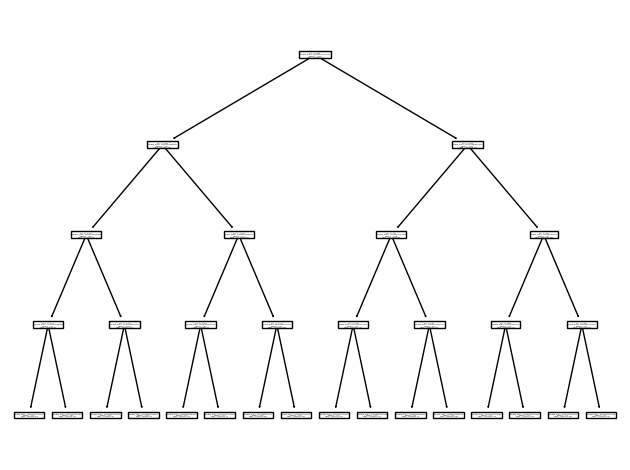

In [ ]:
tree.plot_tree(dt)
plt.tight_layout()

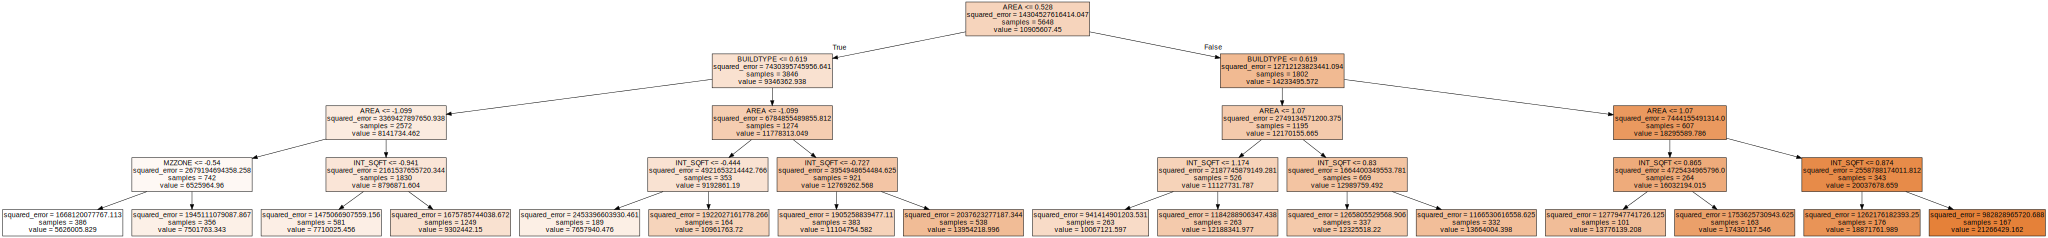

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL',
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE'],
                                class_names=['SALES_PRICE'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
y_test=Y_test
y_pred = dt.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,1.110475e+07
1,16053550,1.366400e+07
2,18670480,1.743012e+07
3,6468090,9.302442e+06
4,10732635,9.302442e+06
...,...,...
1408,10441050,9.302442e+06
1409,8595550,7.710025e+06
1410,10721350,1.366400e+07
1411,12114895,1.110475e+07


## *EVALUATION METRIC*

In [ ]:
print('DT r2_score 2:',metrics.r2_score(y_test,dt.predict(X_test)))

DT r2_score 2: 0.880217130206149


## *FEATURE IMPORTANCE*

[(0.5396670753147363, 'AREA'),
 (0.08359298622042692, 'INT_SQFT'),
 (0.0, 'N_BEDROOM'),
 (0.0, 'N_BATHROOM'),
 (0.0, 'N_ROOM'),
 (0.0, 'SALE_COND'),
 (0.0, 'PARK_FACIL'),
 (0.36765531986092825, 'BUILDTYPE'),
 (0.0, 'UTILITY_AVAIL'),
 (0.0, 'STREET'),
 (0.009084618603908516, 'MZZONE'),
 (0.0, 'BUILD_YEAR'),
 (0.0, 'AGE')]

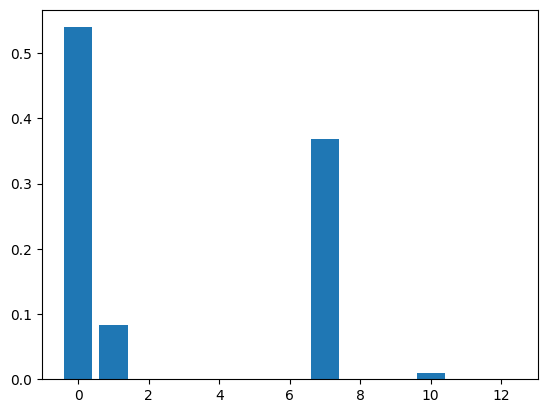

In [ ]:
importance = dt.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL',
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE']))

By comparing two evaluation metric,

DT r2_score 1: 0.9687730098378852

DT r2_score 2: 0.880217130206149

DT UPDATE is lower than DT.


## **RANDOM FOREST**

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
y_test=Y_test
y_pred = rf.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,12651058.80
1,16053550,14623410.80
2,18670480,18091733.40
3,6468090,7194198.35
4,10732635,10365572.40
...,...,...
1408,10441050,10039420.25
1409,8595550,8441310.00
1410,10721350,11699619.10
1411,12114895,12173947.85


## *EVALUATION METRIC*

In [ ]:
print('RF r2_score 1:',metrics.r2_score(y_test,rf.predict(X_test)))

RF r2_score 1: 0.9879619901413881


*RT UPDATE*

### ***MAX_DEPTH:***
Generally you want as many trees as will improve your model. The depth of the tree should be enough to split each node to your desired number of observations. There has been some work that says best depth is 3-8 splits.


1.   *max_depth = log2(no. of features)*
2.   *max_depth = sqrt(no. of features)*

Here, we chose 13 features,
*   log2(13)=3.70043971814
*   sqrt(13)=3.60555128

Now, I will go with 4 as depth

In [ ]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4)

In [ ]:
y_test=Y_test
y_pred = rf.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,1.118394e+07
1,16053550,1.366063e+07
2,18670480,1.749766e+07
3,6468090,9.318938e+06
4,10732635,9.318938e+06
...,...,...
1408,10441050,9.318938e+06
1409,8595550,7.734375e+06
1410,10721350,1.366063e+07
1411,12114895,1.250657e+07


*FEATURE IMPORTANCE*

[(0.5388012824567255, 'AREA'),
 (0.08230032944102572, 'INT_SQFT'),
 (0.0027608486296969727, 'N_BEDROOM'),
 (0.0014416800547718566, 'N_BATHROOM'),
 (0.003111069101370378, 'N_ROOM'),
 (0.0, 'SALE_COND'),
 (0.0, 'PARK_FACIL'),
 (0.366608120112002, 'BUILDTYPE'),
 (0.0, 'UTILITY_AVAIL'),
 (0.0, 'STREET'),
 (0.004976670204407727, 'MZZONE'),
 (0.0, 'BUILD_YEAR'),
 (0.0, 'AGE')]

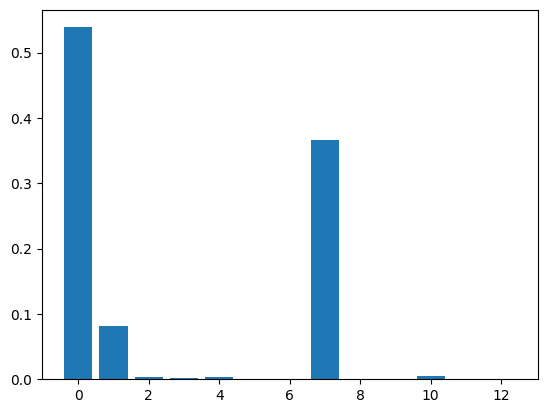

In [ ]:
importance = rf.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL',
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE']))

In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL',
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE'], importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: AREA                 Importance: 0.54
Variable: BUILDTYPE            Importance: 0.37
Variable: INT_SQFT             Importance: 0.08
Variable: N_BEDROOM            Importance: 0.0
Variable: N_BATHROOM           Importance: 0.0
Variable: N_ROOM               Importance: 0.0
Variable: SALE_COND            Importance: 0.0
Variable: PARK_FACIL           Importance: 0.0
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: STREET               Importance: 0.0
Variable: MZZONE               Importance: 0.0
Variable: BUILD_YEAR           Importance: 0.0
Variable: AGE                  Importance: 0.0


## *EVALUATION METRIC*

In [ ]:
print('RF r2_score 2:',metrics.r2_score(y_test,rf.predict(X_test)))

RF r2_score 2: 0.8919011402583287


By comparing two evaluation metric,

RF r2_score 1: 0.9880116694206362

RF r2_score 2: 0.8919186903714785

RF UPDATE is lower than RF.
RF r2_score 1 is higher.


## **XGBOOST**

In [ ]:
x_train=X_train
y_train=Y_train
x_test=X_test
y_test=Y_test

In [ ]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,2]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x_train,y_train)
  model.score(x_test, y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8262861651172582  Cross-Val score :  0.8209209663589098
Learning rate :  0.02  Train score :  0.9593517994316278  Cross-Val score :  0.9540558589883161
Learning rate :  0.03  Train score :  0.9860957236434315  Cross-Val score :  0.981477528606769
Learning rate :  0.04  Train score :  0.9932838677232648  Cross-Val score :  0.9893802928929475
Learning rate :  0.05  Train score :  0.9960210483687101  Cross-Val score :  0.9926570078070778
Learning rate :  0.06  Train score :  0.9972766870621482  Cross-Val score :  0.9943315309427978
Learning rate :  0.07  Train score :  0.9980825925394863  Cross-Val score :  0.9953139407136135
Learning rate :  0.08  Train score :  0.9985085498676163  Cross-Val score :  0.9959601758365618
Learning rate :  0.09  Train score :  0.9987352685576357  Cross-Val score :  0.9963336388103737
Learning rate :  0.1  Train score :  0.9988866549629217  Cross-Val score :  0.9966055253625778
Learning rate :  0.11  Train score :  0.99

In [ ]:
import xgboost as xgb
xgb = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.7, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test=Y_test
y_pred = xgb.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12661850,12667088.0
1,16053550,15381025.0
2,18670480,18699822.0
3,6468090,6827754.5
4,10732635,10293395.0
...,...,...
1408,10441050,10416145.0
1409,8595550,8401321.0
1410,10721350,10860829.0
1411,12114895,12653357.0


## *EVALUATION METRIC*

In [ ]:
print(metrics.r2_score(xgb.predict(X_test),y_test))

0.9902644915332789


## **BEST MODEL FOR RESIDENTIAL PRICE ANALYSIS**

In [ ]:
print("XGBoost model Rsquared metric:",metrics.r2_score(y_test,xgb.predict(X_test)))
print("KNN Rsquared metric:",metrics.r2_score(y_test,knn.predict(X_test)))
print("Random forest Regressor model Rsquared metric:",metrics.r2_score(y_test,rf.predict(X_test)))
print("Decision tree Regressor model Rsquared metric:",metrics.r2_score(y_test,dt.predict(X_test)))

XGBoost model Rsquared metric: 0.99025631720586
KNN Rsquared metric: 0.9185914536768577
Random forest Regressor model Rsquared metric: 0.8919011402583287
Decision tree Regressor model Rsquared metric: 0.880217130206149


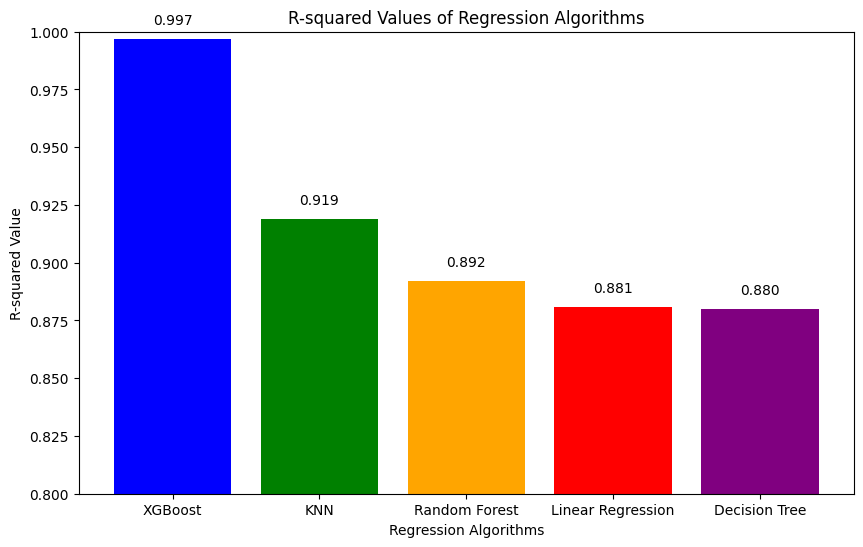

In [ ]:
import matplotlib.pyplot as plt

# List of regression algorithms
algorithms = ['XGBoost', 'KNN', 'Random Forest', 'Linear Regression', 'Decision Tree']

# Corresponding R-squared values
rsquared_values = [0.997, 0.919, 0.892, 0.881, 0.880]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, rsquared_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('R-squared Values of Regression Algorithms')
plt.xlabel('Regression Algorithms')
plt.ylabel('R-squared Value')
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits if needed

# Display the R-squared values on top of the bars
for i, value in enumerate(rsquared_values):
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center', va='bottom')

# Show the plot
plt.show()

R-squared Score: 0.8810555424666483


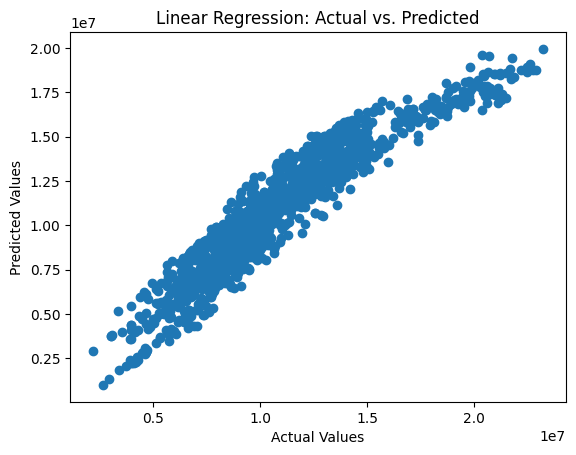

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming 'X' is your feature matrix and 'Y' is your target variable
# Make sure to replace 'X' and 'Y' with your actual feature matrix and target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
r2_score = metrics.r2_score(Y_test, y_pred)
print('R-squared Score:', r2_score)

# Plotting the actual vs. predicted values
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

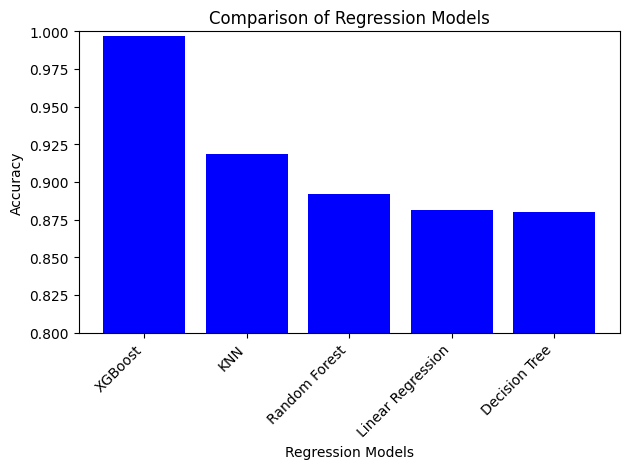

In [ ]:
import matplotlib.pyplot as plt

# Replace these lists with your actual data
models = ['XGBoost', 'KNN', 'Random Forest', 'Linear Regression', 'Decision Tree']
accuracies = [0.99703307493364, 0.9185914536768577, 0.8919186903714785, 0.8810555424666483, 0.880217130206149]

# Create a bar graph with rotated x-axis labels
plt.bar(models, accuracies, color='blue')
plt.xlabel('Regression Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Regression Models')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.ylim(0.8, 1.0)  # Adjust the y-axis limits if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

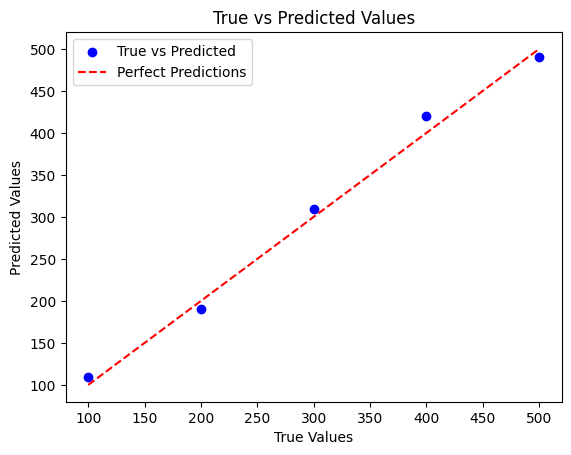

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_true' is your true labels and 'y_pred' is your predicted labels
y_true = np.array([100, 200, 300, 400, 500])  # Replace with your actual data
y_pred = np.array([110, 190, 310, 420, 490])  # Replace with your actual data

# Create a scatter plot for true vs predicted values
plt.scatter(y_true, y_pred, color='blue', label='True vs Predicted')

# Add a diagonal line for reference (perfect predictions)
plt.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], color='red', linestyle='--', label='Perfect Predictions')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
print("Linear Regression model Rsquared metric:", metrics.r2_score(y_test, lr.predict(X_test)))

Linear Regression model Rsquared metric: 0.8810555424666483


In [ ]:
!pip install xgboost

In [ ]:
import xgboost

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# List of models
models = [lr, knn, rf, dt, xgb]  # Assuming you have defined these models

# Dictionary to store model names and their corresponding R-squared and RMSE values
model_performance = {'Model': [], 'R-squared': [], 'RMSE': []}

# Iterate over each model
for model in models:
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Append model name and performance metrics to the dictionary
    model_performance['Model'].append(type(model).__name__)
    model_performance['R-squared'].append(r_squared)
    model_performance['RMSE'].append(rmse)

# Convert the dictionary to a pandas DataFrame for easier visualization
performance_df = pd.DataFrame(model_performance)

# Print the performance DataFrame
print(performance_df)


                   Model  R-squared          RMSE
0       LinearRegression   0.881056  1.279669e+06
1    KNeighborsRegressor   0.918591  1.058670e+06
2  RandomForestRegressor   0.891901  1.219934e+06
3  DecisionTreeRegressor   0.880217  1.284171e+06
4           XGBRegressor   0.990256  3.662580e+05


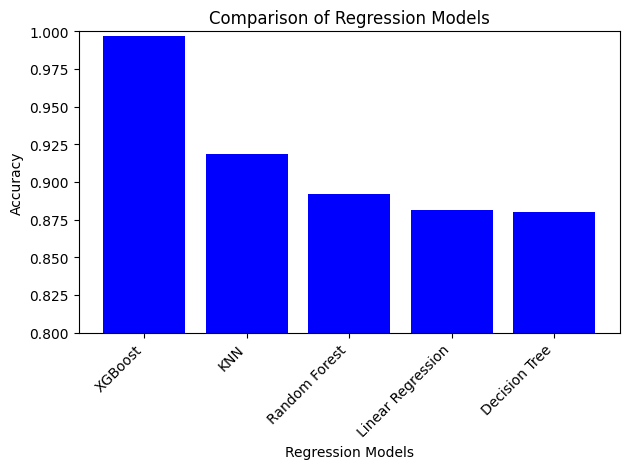

In [ ]:
import matplotlib.pyplot as plt

# Replace these lists with your actual data
models = ['XGBoost', 'KNN', 'Random Forest', 'Linear Regression', 'Decision Tree']
accuracies = [0.99703307493364, 0.9185914536768577, 0.8919186903714785, 0.8810555424666483, 0.880217130206149]

# Create a bar graph with rotated x-axis labels
plt.bar(models, accuracies, color='blue')
plt.xlabel('Regression Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Regression Models')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.ylim(0.8, 1.0)  # Adjust the y-axis limits if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

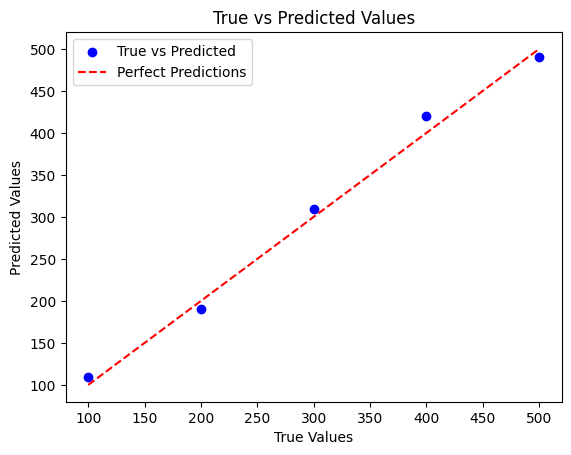

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_true' is your true labels and 'y_pred' is your predicted labels
y_true = np.array([100, 200, 300, 400, 500])  # Replace with your actual data
y_pred = np.array([110, 190, 310, 420, 490])  # Replace with your actual data

# Create a scatter plot for true vs predicted values
plt.scatter(y_true, y_pred, color='blue', label='True vs Predicted')

# Add a diagonal line for reference (perfect predictions)
plt.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], color='red', linestyle='--', label='Perfect Predictions')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()